## Setup

In [6]:
# Common imports
import sys
import os
import sklearn
import numpy as np
import pandas as pd
import urllib
import tensorflow as tf
from tensorflow import keras


# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Get the data

In [2]:
DOWNLOAD_ROOT = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"
WINE_PATH = os.path.join("datasets", "wines")
REDWINE_FILE = "winequality-red.csv"
WHITEWINE_FILE = "winequality-white.csv"
REDWINE_URL = DOWNLOAD_ROOT + REDWINE_FILE
WHITEWINE_URL = DOWNLOAD_ROOT + WHITEWINE_FILE
# This function creates a dataset/wines directory, downloads the winequality-red.csv and winequality-white.csv file
def fetch_wine_data(whitewine_url=WHITEWINE_URL, redwine_url_url=REDWINE_URL, wine_path=WINE_PATH, redwine_file=REDWINE_FILE, whitewine_file=WHITEWINE_FILE):
    if not os.path.isdir(wine_path):
        os.makedirs(wine_path)
    red_path = os.path.join(wine_path, redwine_file)
    white_path = os.path.join(wine_path, whitewine_file)
    urllib.request.urlretrieve(whitewine_url, white_path)
    urllib.request.urlretrieve(redwine_url_url, red_path)
    
fetch_wine_data()

## Load, split and scale the dataset

In [3]:
# Loads the dataset from the csv file and returns a pandas DataFrame object.
def load_wine_data(wine_file, wine_path=WINE_PATH):
    csv_path = os.path.join(wine_path, wine_file)
    return pd.read_csv(csv_path,sep=";")

whitewine = load_wine_data(wine_file=WHITEWINE_FILE)
# load the dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = whitewine.iloc[:, 0:11].values
y = whitewine.iloc[:,-1].values

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)




In [4]:
X_train.shape[1:]

(11,)

## Build, compile, train and evaluate a model

In [9]:

def getModel(optimizer = 'sgd'):
    model = keras.models.Sequential([
    # hidden layer
    keras.layers.Dense(6, activation="relu", input_shape=X_train.shape[1:]),
    # output layer
    keras.layers.Dense(1)
    ])
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    return model

model = getModel()

In [11]:
# Train the model.
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
87/87 [==============================] - 0s 2ms/step - loss: 0.5371 - val_loss: 0.7672
Epoch 2/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5527 - val_loss: 0.5768
Epoch 3/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5391 - val_loss: 0.5856
Epoch 4/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5400 - val_loss: 0.5633
Epoch 5/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5361 - val_loss: 0.5607
Epoch 6/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5350 - val_loss: 0.5555
Epoch 7/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5335 - val_loss: 0.5821
Epoch 8/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5341 - val_loss: 0.5527
Epoch 9/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5313 - val_loss: 0.6477
Epoch 10/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5358 - val_loss: 0.5591
Epoch 11/

87/87 [==============================] - 0s 1ms/step - loss: 0.5058 - val_loss: 0.5453
Epoch 84/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5049 - val_loss: 0.6024
Epoch 85/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5038 - val_loss: 0.5228
Epoch 86/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5029 - val_loss: 0.6164
Epoch 87/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5090 - val_loss: 0.5240
Epoch 88/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5027 - val_loss: 0.5421
Epoch 89/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5021 - val_loss: 0.5380
Epoch 90/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5018 - val_loss: 0.5405
Epoch 91/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5045 - val_loss: 0.5259
Epoch 92/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5031 - val_loss: 0.5578
Epoch 93/100


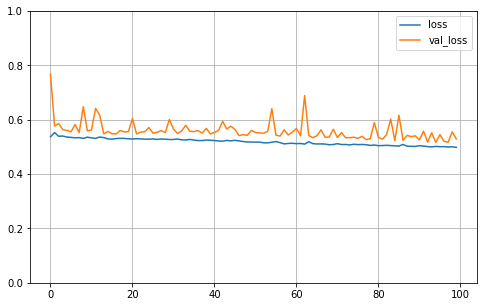

In [12]:
# Show the learning curves.         
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()         

In [13]:
# Evaluate the model (outputs the RMSE).
model.evaluate(X_test, y_test)

39/39 [==============================] - 0s 821us/step - loss: 0.5167


0.5167479515075684

### Use GridSearchCV to tune hyperparameters

In [14]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor


par = {'batch_size' : [25,32],
          'epochs' : [200,500],
          'optimizer':['adam','rmsprop']}


Kmodel = KerasRegressor(build_fn=getModel, verbose=1)
grid = GridSearchCV(estimator=Kmodel, param_grid = par)
grid_result = grid.fit(X_train, y_train)

Epoch 1/200
89/89 [==============================] - 0s 898us/step - loss: 34.2072
Epoch 2/200
89/89 [==============================] - 0s 898us/step - loss: 26.8742
Epoch 3/200
89/89 [==============================] - 0s 808us/step - loss: 21.0798
Epoch 4/200
89/89 [==============================] - 0s 808us/step - loss: 16.1047
Epoch 5/200
89/89 [==============================] - 0s 808us/step - loss: 11.9161
Epoch 6/200
89/89 [==============================] - 0s 808us/step - loss: 8.7248
Epoch 7/200
89/89 [==============================] - 0s 898us/step - loss: 6.5937
Epoch 8/200
89/89 [==============================] - 0s 719us/step - loss: 5.2684
Epoch 9/200
89/89 [==============================] - 0s 809us/step - loss: 4.4468
Epoch 10/200
89/89 [==============================] - 0s 898us/step - loss: 3.8981
Epoch 11/200
89/89 [==============================] - 0s 808us/step - loss: 3.5045
Epoch 12/200
89/89 [==============================] - 0s 808us/step - loss: 3.1780
Epoch 13

89/89 [==============================] - 0s 808us/step - loss: 0.5172
Epoch 100/200
89/89 [==============================] - 0s 719us/step - loss: 0.5173
Epoch 101/200
89/89 [==============================] - 0s 719us/step - loss: 0.5157
Epoch 102/200
89/89 [==============================] - 0s 719us/step - loss: 0.5153
Epoch 103/200
89/89 [==============================] - 0s 719us/step - loss: 0.5149
Epoch 104/200
89/89 [==============================] - 0s 719us/step - loss: 0.5143
Epoch 105/200
89/89 [==============================] - 0s 808us/step - loss: 0.5142
Epoch 106/200
89/89 [==============================] - 0s 808us/step - loss: 0.5145
Epoch 107/200
89/89 [==============================] - 0s 719us/step - loss: 0.5168
Epoch 108/200
89/89 [==============================] - 0s 719us/step - loss: 0.5134
Epoch 109/200
89/89 [==============================] - 0s 719us/step - loss: 0.5119
Epoch 110/200
89/89 [==============================] - 0s 719us/step - loss: 0.5123
Epoch 

89/89 [==============================] - 0s 808us/step - loss: 0.5033
Epoch 197/200
89/89 [==============================] - 0s 808us/step - loss: 0.5017
Epoch 198/200
89/89 [==============================] - 0s 808us/step - loss: 0.5006
Epoch 199/200
89/89 [==============================] - 0s 808us/step - loss: 0.4999
Epoch 200/200
23/23 [==============================] - 0s 1ms/step - loss: 0.4712
Epoch 1/200
89/89 [==============================] - 0s 808us/step - loss: 35.6622
Epoch 2/200
89/89 [==============================] - 0s 809us/step - loss: 29.7193
Epoch 3/200
89/89 [==============================] - 0s 808us/step - loss: 24.8502
Epoch 4/200
89/89 [==============================] - 0s 808us/step - loss: 20.7273
Epoch 5/200
89/89 [==============================] - 0s 898us/step - loss: 17.3394
Epoch 6/200
89/89 [==============================] - 0s 808us/step - loss: 14.3786
Epoch 7/200
89/89 [==============================] - 0s 719us/step - loss: 11.2376
Epoch 8/200
89/

89/89 [==============================] - 0s 719us/step - loss: 0.4989
Epoch 95/200
89/89 [==============================] - 0s 719us/step - loss: 0.4993
Epoch 96/200
89/89 [==============================] - 0s 719us/step - loss: 0.4986
Epoch 97/200
89/89 [==============================] - 0s 808us/step - loss: 0.4981
Epoch 98/200
89/89 [==============================] - 0s 808us/step - loss: 0.4979
Epoch 99/200
89/89 [==============================] - 0s 808us/step - loss: 0.4975
Epoch 100/200
89/89 [==============================] - 0s 719us/step - loss: 0.4973
Epoch 101/200
89/89 [==============================] - 0s 808us/step - loss: 0.4975
Epoch 102/200
89/89 [==============================] - 0s 719us/step - loss: 0.4962
Epoch 103/200
89/89 [==============================] - 0s 719us/step - loss: 0.4960
Epoch 104/200
89/89 [==============================] - 0s 808us/step - loss: 0.4960
Epoch 105/200
89/89 [==============================] - 0s 719us/step - loss: 0.4961
Epoch 106/2

89/89 [==============================] - 0s 1ms/step - loss: 0.4778
Epoch 192/200
89/89 [==============================] - 0s 898us/step - loss: 0.4785
Epoch 193/200
89/89 [==============================] - 0s 898us/step - loss: 0.4794
Epoch 194/200
89/89 [==============================] - 0s 988us/step - loss: 0.4794
Epoch 195/200
89/89 [==============================] - 0s 988us/step - loss: 0.4779
Epoch 196/200
89/89 [==============================] - 0s 988us/step - loss: 0.4812
Epoch 197/200
89/89 [==============================] - 0s 898us/step - loss: 0.4792
Epoch 198/200
89/89 [==============================] - 0s 997us/step - loss: 0.4778
Epoch 199/200
89/89 [==============================] - 0s 988us/step - loss: 0.4774
Epoch 200/200
23/23 [==============================] - 0s 695us/step - loss: 0.6580
Epoch 1/200
89/89 [==============================] - 0s 889us/step - loss: 30.6212
Epoch 2/200
89/89 [==============================] - 0s 904us/step - loss: 25.3222
Epoch 3/20

Epoch 89/200
89/89 [==============================] - 0s 719us/step - loss: 0.5228
Epoch 90/200
89/89 [==============================] - 0s 754us/step - loss: 0.5248
Epoch 91/200
89/89 [==============================] - 0s 743us/step - loss: 0.5234
Epoch 92/200
89/89 [==============================] - 0s 768us/step - loss: 0.5226
Epoch 93/200
89/89 [==============================] - 0s 808us/step - loss: 0.5212
Epoch 94/200
89/89 [==============================] - 0s 808us/step - loss: 0.5203
Epoch 95/200
89/89 [==============================] - 0s 808us/step - loss: 0.5210
Epoch 96/200
89/89 [==============================] - 0s 719us/step - loss: 0.5210
Epoch 97/200
89/89 [==============================] - 0s 719us/step - loss: 0.5189
Epoch 98/200
89/89 [==============================] - 0s 719us/step - loss: 0.5189
Epoch 99/200
89/89 [==============================] - 0s 719us/step - loss: 0.5201
Epoch 100/200
89/89 [==============================] - 0s 808us/step - loss: 0.5190
Epo

89/89 [==============================] - 0s 808us/step - loss: 0.5010
Epoch 187/200
89/89 [==============================] - 0s 808us/step - loss: 0.5020
Epoch 188/200
89/89 [==============================] - 0s 808us/step - loss: 0.5005
Epoch 189/200
89/89 [==============================] - 0s 808us/step - loss: 0.5013
Epoch 190/200
89/89 [==============================] - 0s 808us/step - loss: 0.5025
Epoch 191/200
89/89 [==============================] - 0s 719us/step - loss: 0.4998
Epoch 192/200
89/89 [==============================] - 0s 719us/step - loss: 0.4996
Epoch 193/200
89/89 [==============================] - 0s 719us/step - loss: 0.4998
Epoch 194/200
89/89 [==============================] - 0s 719us/step - loss: 0.5036
Epoch 195/200
89/89 [==============================] - 0s 719us/step - loss: 0.5000
Epoch 196/200
89/89 [==============================] - 0s 808us/step - loss: 0.5004
Epoch 197/200
89/89 [==============================] - 0s 808us/step - loss: 0.4996
Epoch 

89/89 [==============================] - 0s 719us/step - loss: 0.5219
Epoch 84/200
89/89 [==============================] - 0s 719us/step - loss: 0.5225
Epoch 85/200
89/89 [==============================] - 0s 719us/step - loss: 0.5227
Epoch 86/200
89/89 [==============================] - 0s 808us/step - loss: 0.5218
Epoch 87/200
89/89 [==============================] - 0s 746us/step - loss: 0.5226
Epoch 88/200
89/89 [==============================] - 0s 719us/step - loss: 0.5205
Epoch 89/200
89/89 [==============================] - 0s 809us/step - loss: 0.5202
Epoch 90/200
89/89 [==============================] - 0s 808us/step - loss: 0.5207
Epoch 91/200
89/89 [==============================] - 0s 808us/step - loss: 0.5202
Epoch 92/200
89/89 [==============================] - 0s 719us/step - loss: 0.5191
Epoch 93/200
89/89 [==============================] - 0s 719us/step - loss: 0.5186
Epoch 94/200
89/89 [==============================] - 0s 719us/step - loss: 0.5185
Epoch 95/200
89/8

89/89 [==============================] - 0s 808us/step - loss: 0.4989
Epoch 181/200
89/89 [==============================] - 0s 808us/step - loss: 0.5003
Epoch 182/200
89/89 [==============================] - 0s 719us/step - loss: 0.4994
Epoch 183/200
89/89 [==============================] - 0s 719us/step - loss: 0.4977
Epoch 184/200
89/89 [==============================] - 0s 808us/step - loss: 0.4980
Epoch 185/200
89/89 [==============================] - 0s 727us/step - loss: 0.4989
Epoch 186/200
89/89 [==============================] - 0s 719us/step - loss: 0.4993
Epoch 187/200
89/89 [==============================] - 0s 719us/step - loss: 0.4988
Epoch 188/200
89/89 [==============================] - 0s 808us/step - loss: 0.4989
Epoch 189/200
89/89 [==============================] - 0s 719us/step - loss: 0.4991
Epoch 190/200
89/89 [==============================] - 0s 719us/step - loss: 0.4984
Epoch 191/200
89/89 [==============================] - 0s 719us/step - loss: 0.4972
Epoch 

89/89 [==============================] - 0s 808us/step - loss: 0.5303
Epoch 78/200
89/89 [==============================] - 0s 719us/step - loss: 0.5294
Epoch 79/200
89/89 [==============================] - 0s 719us/step - loss: 0.5292
Epoch 80/200
89/89 [==============================] - 0s 808us/step - loss: 0.5300
Epoch 81/200
89/89 [==============================] - 0s 808us/step - loss: 0.5285
Epoch 82/200
89/89 [==============================] - 0s 808us/step - loss: 0.5284
Epoch 83/200
89/89 [==============================] - 0s 719us/step - loss: 0.5284
Epoch 84/200
89/89 [==============================] - 0s 719us/step - loss: 0.5269
Epoch 85/200
89/89 [==============================] - 0s 727us/step - loss: 0.5262
Epoch 86/200
89/89 [==============================] - 0s 719us/step - loss: 0.5273
Epoch 87/200
89/89 [==============================] - 0s 808us/step - loss: 0.5264
Epoch 88/200
89/89 [==============================] - 0s 898us/step - loss: 0.5263
Epoch 89/200
89/8

Epoch 175/200
89/89 [==============================] - 0s 807us/step - loss: 0.5192
Epoch 176/200
89/89 [==============================] - 0s 719us/step - loss: 0.5191
Epoch 177/200
89/89 [==============================] - 0s 719us/step - loss: 0.5199
Epoch 178/200
89/89 [==============================] - 0s 719us/step - loss: 0.5187
Epoch 179/200
89/89 [==============================] - 0s 719us/step - loss: 0.5194
Epoch 180/200
89/89 [==============================] - 0s 808us/step - loss: 0.5196
Epoch 181/200
89/89 [==============================] - 0s 719us/step - loss: 0.5205
Epoch 182/200
89/89 [==============================] - 0s 719us/step - loss: 0.5179
Epoch 183/200
89/89 [==============================] - 0s 728us/step - loss: 0.5193
Epoch 184/200
89/89 [==============================] - 0s 808us/step - loss: 0.5192
Epoch 185/200
89/89 [==============================] - 0s 808us/step - loss: 0.5184
Epoch 186/200
89/89 [==============================] - 0s 808us/step - loss:

89/89 [==============================] - 0s 729us/step - loss: 0.5204
Epoch 70/200
89/89 [==============================] - 0s 808us/step - loss: 0.5220
Epoch 71/200
89/89 [==============================] - 0s 719us/step - loss: 0.5201
Epoch 72/200
89/89 [==============================] - 0s 719us/step - loss: 0.5193
Epoch 73/200
89/89 [==============================] - 0s 719us/step - loss: 0.5202
Epoch 74/200
89/89 [==============================] - 0s 808us/step - loss: 0.5206
Epoch 75/200
89/89 [==============================] - 0s 719us/step - loss: 0.5183
Epoch 76/200
89/89 [==============================] - 0s 719us/step - loss: 0.5192
Epoch 77/200
89/89 [==============================] - 0s 719us/step - loss: 0.5190
Epoch 78/200
89/89 [==============================] - 0s 718us/step - loss: 0.5177
Epoch 79/200
89/89 [==============================] - 0s 719us/step - loss: 0.5180
Epoch 80/200
89/89 [==============================] - 0s 719us/step - loss: 0.5174
Epoch 81/200
89/8

89/89 [==============================] - 0s 719us/step - loss: 0.5043
Epoch 168/200
89/89 [==============================] - 0s 719us/step - loss: 0.5051
Epoch 169/200
89/89 [==============================] - 0s 808us/step - loss: 0.5052
Epoch 170/200
89/89 [==============================] - 0s 898us/step - loss: 0.5043
Epoch 171/200
89/89 [==============================] - 0s 808us/step - loss: 0.5039
Epoch 172/200
89/89 [==============================] - 0s 719us/step - loss: 0.5044
Epoch 173/200
89/89 [==============================] - 0s 719us/step - loss: 0.5052
Epoch 174/200
89/89 [==============================] - 0s 718us/step - loss: 0.5040
Epoch 175/200
89/89 [==============================] - 0s 719us/step - loss: 0.5044
Epoch 176/200
89/89 [==============================] - 0s 719us/step - loss: 0.5050
Epoch 177/200
89/89 [==============================] - 0s 719us/step - loss: 0.5047
Epoch 178/200
89/89 [==============================] - 0s 719us/step - loss: 0.5053
Epoch 

89/89 [==============================] - 0s 808us/step - loss: 0.5064
Epoch 65/200
89/89 [==============================] - 0s 808us/step - loss: 0.5066
Epoch 66/200
89/89 [==============================] - 0s 727us/step - loss: 0.5057
Epoch 67/200
89/89 [==============================] - 0s 808us/step - loss: 0.5044
Epoch 68/200
89/89 [==============================] - 0s 808us/step - loss: 0.5030
Epoch 69/200
89/89 [==============================] - 0s 808us/step - loss: 0.5040
Epoch 70/200
89/89 [==============================] - 0s 808us/step - loss: 0.5029
Epoch 71/200
89/89 [==============================] - 0s 808us/step - loss: 0.5024
Epoch 72/200
89/89 [==============================] - 0s 808us/step - loss: 0.5022
Epoch 73/200
89/89 [==============================] - 0s 808us/step - loss: 0.5020
Epoch 74/200
89/89 [==============================] - 0s 808us/step - loss: 0.5013
Epoch 75/200
89/89 [==============================] - 0s 808us/step - loss: 0.5012
Epoch 76/200
89/8

89/89 [==============================] - 0s 808us/step - loss: 0.4842
Epoch 163/200
89/89 [==============================] - 0s 808us/step - loss: 0.4850
Epoch 164/200
89/89 [==============================] - 0s 808us/step - loss: 0.4851
Epoch 165/200
89/89 [==============================] - 0s 808us/step - loss: 0.4846
Epoch 166/200
89/89 [==============================] - 0s 719us/step - loss: 0.4845
Epoch 167/200
89/89 [==============================] - 0s 719us/step - loss: 0.4843
Epoch 168/200
89/89 [==============================] - 0s 808us/step - loss: 0.4844
Epoch 169/200
89/89 [==============================] - 0s 808us/step - loss: 0.4846
Epoch 170/200
89/89 [==============================] - 0s 808us/step - loss: 0.4833
Epoch 171/200
89/89 [==============================] - 0s 808us/step - loss: 0.4834
Epoch 172/200
89/89 [==============================] - 0s 808us/step - loss: 0.4841
Epoch 173/200
89/89 [==============================] - 0s 808us/step - loss: 0.4839
Epoch 

89/89 [==============================] - 0s 719us/step - loss: 0.5172
Epoch 57/200
89/89 [==============================] - 0s 719us/step - loss: 0.5154
Epoch 58/200
89/89 [==============================] - 0s 719us/step - loss: 0.5172
Epoch 59/200
89/89 [==============================] - 0s 808us/step - loss: 0.5168
Epoch 60/200
89/89 [==============================] - 0s 808us/step - loss: 0.5159
Epoch 61/200
89/89 [==============================] - 0s 719us/step - loss: 0.5158
Epoch 62/200
89/89 [==============================] - 0s 808us/step - loss: 0.5145
Epoch 63/200
89/89 [==============================] - 0s 808us/step - loss: 0.5153
Epoch 64/200
89/89 [==============================] - 0s 808us/step - loss: 0.5141
Epoch 65/200
89/89 [==============================] - 0s 808us/step - loss: 0.5145
Epoch 66/200
89/89 [==============================] - 0s 719us/step - loss: 0.5139
Epoch 67/200
89/89 [==============================] - 0s 719us/step - loss: 0.5131
Epoch 68/200
89/8

89/89 [==============================] - 0s 719us/step - loss: 0.5002
Epoch 155/200
89/89 [==============================] - 0s 719us/step - loss: 0.4998
Epoch 156/200
89/89 [==============================] - 0s 727us/step - loss: 0.4993
Epoch 157/200
89/89 [==============================] - 0s 719us/step - loss: 0.4996
Epoch 158/200
89/89 [==============================] - 0s 719us/step - loss: 0.4986
Epoch 159/200
89/89 [==============================] - 0s 808us/step - loss: 0.4986
Epoch 160/200
89/89 [==============================] - 0s 808us/step - loss: 0.4994
Epoch 161/200
89/89 [==============================] - 0s 808us/step - loss: 0.4991
Epoch 162/200
89/89 [==============================] - 0s 808us/step - loss: 0.4985
Epoch 163/200
89/89 [==============================] - 0s 808us/step - loss: 0.4986
Epoch 164/200
89/89 [==============================] - 0s 808us/step - loss: 0.4990
Epoch 165/200
89/89 [==============================] - 0s 808us/step - loss: 0.4977
Epoch 

89/89 [==============================] - 0s 988us/step - loss: 0.5507
Epoch 52/200
89/89 [==============================] - 0s 898us/step - loss: 0.5489
Epoch 53/200
89/89 [==============================] - 0s 898us/step - loss: 0.5480
Epoch 54/200
89/89 [==============================] - 0s 898us/step - loss: 0.5459
Epoch 55/200
89/89 [==============================] - 0s 898us/step - loss: 0.5454
Epoch 56/200
89/89 [==============================] - 0s 998us/step - loss: 0.5435
Epoch 57/200
89/89 [==============================] - 0s 808us/step - loss: 0.5420
Epoch 58/200
89/89 [==============================] - 0s 808us/step - loss: 0.5412
Epoch 59/200
89/89 [==============================] - 0s 719us/step - loss: 0.5398
Epoch 60/200
89/89 [==============================] - 0s 719us/step - loss: 0.5381
Epoch 61/200
89/89 [==============================] - 0s 719us/step - loss: 0.5397
Epoch 62/200
89/89 [==============================] - 0s 718us/step - loss: 0.5380
Epoch 63/200
89/8

89/89 [==============================] - 0s 719us/step - loss: 0.5061
Epoch 150/200
89/89 [==============================] - 0s 719us/step - loss: 0.5058
Epoch 151/200
89/89 [==============================] - 0s 719us/step - loss: 0.5060
Epoch 152/200
89/89 [==============================] - 0s 808us/step - loss: 0.5068
Epoch 153/200
89/89 [==============================] - 0s 808us/step - loss: 0.5066
Epoch 154/200
89/89 [==============================] - 0s 719us/step - loss: 0.5069
Epoch 155/200
89/89 [==============================] - 0s 727us/step - loss: 0.5056
Epoch 156/200
89/89 [==============================] - 0s 719us/step - loss: 0.5054
Epoch 157/200
89/89 [==============================] - 0s 808us/step - loss: 0.5068
Epoch 158/200
89/89 [==============================] - 0s 719us/step - loss: 0.5059
Epoch 159/200
89/89 [==============================] - 0s 808us/step - loss: 0.5056
Epoch 160/200
89/89 [==============================] - 0s 719us/step - loss: 0.5057
Epoch 

89/89 [==============================] - 0s 808us/step - loss: 0.5426
Epoch 47/200
89/89 [==============================] - 0s 808us/step - loss: 0.5400
Epoch 48/200
89/89 [==============================] - 0s 808us/step - loss: 0.5372
Epoch 49/200
89/89 [==============================] - 0s 719us/step - loss: 0.5357
Epoch 50/200
89/89 [==============================] - 0s 808us/step - loss: 0.5344
Epoch 51/200
89/89 [==============================] - 0s 988us/step - loss: 0.5305
Epoch 52/200
89/89 [==============================] - 0s 988us/step - loss: 0.5296
Epoch 53/200
89/89 [==============================] - 0s 988us/step - loss: 0.5283
Epoch 54/200
89/89 [==============================] - 0s 898us/step - loss: 0.5274
Epoch 55/200
89/89 [==============================] - 0s 1ms/step - loss: 0.5252
Epoch 56/200
89/89 [==============================] - 0s 1ms/step - loss: 0.5232
Epoch 57/200
89/89 [==============================] - 0s 1ms/step - loss: 0.5238
Epoch 58/200
89/89 [===

89/89 [==============================] - 0s 808us/step - loss: 0.5031
Epoch 145/200
89/89 [==============================] - 0s 719us/step - loss: 0.5044
Epoch 146/200
89/89 [==============================] - 0s 719us/step - loss: 0.5044
Epoch 147/200
89/89 [==============================] - 0s 818us/step - loss: 0.5042
Epoch 148/200
89/89 [==============================] - 0s 808us/step - loss: 0.5049
Epoch 149/200
89/89 [==============================] - 0s 808us/step - loss: 0.5045
Epoch 150/200
89/89 [==============================] - 0s 808us/step - loss: 0.5034
Epoch 151/200
89/89 [==============================] - 0s 719us/step - loss: 0.5038
Epoch 152/200
89/89 [==============================] - 0s 719us/step - loss: 0.5032
Epoch 153/200
89/89 [==============================] - 0s 719us/step - loss: 0.5042
Epoch 154/200
89/89 [==============================] - 0s 719us/step - loss: 0.5035
Epoch 155/200
89/89 [==============================] - 0s 808us/step - loss: 0.5037
Epoch 

89/89 [==============================] - 0s 808us/step - loss: 0.6038
Epoch 42/500
89/89 [==============================] - 0s 808us/step - loss: 0.6025
Epoch 43/500
89/89 [==============================] - 0s 808us/step - loss: 0.5973
Epoch 44/500
89/89 [==============================] - 0s 808us/step - loss: 0.5969
Epoch 45/500
89/89 [==============================] - 0s 898us/step - loss: 0.5922
Epoch 46/500
89/89 [==============================] - 0s 808us/step - loss: 0.5876
Epoch 47/500
89/89 [==============================] - 0s 732us/step - loss: 0.5861
Epoch 48/500
89/89 [==============================] - 0s 808us/step - loss: 0.5847
Epoch 49/500
89/89 [==============================] - 0s 719us/step - loss: 0.5819
Epoch 50/500
89/89 [==============================] - 0s 808us/step - loss: 0.5820
Epoch 51/500
89/89 [==============================] - 0s 719us/step - loss: 0.5792
Epoch 52/500
89/89 [==============================] - 0s 898us/step - loss: 0.5758
Epoch 53/500
89/8

89/89 [==============================] - 0s 988us/step - loss: 0.5434
Epoch 140/500
89/89 [==============================] - 0s 1ms/step - loss: 0.5416
Epoch 141/500
89/89 [==============================] - 0s 988us/step - loss: 0.5446
Epoch 142/500
89/89 [==============================] - 0s 808us/step - loss: 0.5436
Epoch 143/500
89/89 [==============================] - 0s 808us/step - loss: 0.5449
Epoch 144/500
89/89 [==============================] - 0s 808us/step - loss: 0.5428
Epoch 145/500
89/89 [==============================] - 0s 808us/step - loss: 0.5420
Epoch 146/500
89/89 [==============================] - 0s 808us/step - loss: 0.5423
Epoch 147/500
89/89 [==============================] - 0s 719us/step - loss: 0.5418
Epoch 148/500
89/89 [==============================] - 0s 1ms/step - loss: 0.5416
Epoch 149/500
89/89 [==============================] - 0s 2ms/step - loss: 0.5417
Epoch 150/500
89/89 [==============================] - 0s 779us/step - loss: 0.5425
Epoch 151/50

89/89 [==============================] - 0s 719us/step - loss: 0.5402
Epoch 237/500
89/89 [==============================] - 0s 629us/step - loss: 0.5392
Epoch 238/500
89/89 [==============================] - 0s 719us/step - loss: 0.5373
Epoch 239/500
89/89 [==============================] - 0s 719us/step - loss: 0.5428
Epoch 240/500
89/89 [==============================] - 0s 719us/step - loss: 0.5400
Epoch 241/500
89/89 [==============================] - 0s 719us/step - loss: 0.5392
Epoch 242/500
89/89 [==============================] - 0s 719us/step - loss: 0.5390
Epoch 243/500
89/89 [==============================] - 0s 808us/step - loss: 0.5375
Epoch 244/500
89/89 [==============================] - 0s 988us/step - loss: 0.5383
Epoch 245/500
89/89 [==============================] - 0s 719us/step - loss: 0.5381
Epoch 246/500
89/89 [==============================] - 0s 719us/step - loss: 0.5376
Epoch 247/500
89/89 [==============================] - 0s 719us/step - loss: 0.5393
Epoch 

89/89 [==============================] - 0s 808us/step - loss: 0.5359
Epoch 334/500
89/89 [==============================] - 0s 912us/step - loss: 0.5369
Epoch 335/500
89/89 [==============================] - 0s 898us/step - loss: 0.5361
Epoch 336/500
89/89 [==============================] - 0s 808us/step - loss: 0.5355
Epoch 337/500
89/89 [==============================] - 0s 719us/step - loss: 0.5374
Epoch 338/500
89/89 [==============================] - 0s 898us/step - loss: 0.5374
Epoch 339/500
89/89 [==============================] - 0s 988us/step - loss: 0.5364
Epoch 340/500
89/89 [==============================] - 0s 898us/step - loss: 0.5360
Epoch 341/500
89/89 [==============================] - 0s 719us/step - loss: 0.5373
Epoch 342/500
89/89 [==============================] - 0s 898us/step - loss: 0.5375
Epoch 343/500
89/89 [==============================] - 0s 808us/step - loss: 0.5361
Epoch 344/500
89/89 [==============================] - 0s 808us/step - loss: 0.5352
Epoch 

89/89 [==============================] - 0s 719us/step - loss: 0.5361
Epoch 431/500
89/89 [==============================] - 0s 719us/step - loss: 0.5371
Epoch 432/500
89/89 [==============================] - 0s 719us/step - loss: 0.5353
Epoch 433/500
89/89 [==============================] - 0s 808us/step - loss: 0.5350
Epoch 434/500
89/89 [==============================] - 0s 719us/step - loss: 0.5371
Epoch 435/500
89/89 [==============================] - 0s 718us/step - loss: 0.5348
Epoch 436/500
89/89 [==============================] - 0s 719us/step - loss: 0.5396
Epoch 437/500
89/89 [==============================] - 0s 719us/step - loss: 0.5356
Epoch 438/500
89/89 [==============================] - 0s 719us/step - loss: 0.5382
Epoch 439/500
89/89 [==============================] - 0s 719us/step - loss: 0.5347
Epoch 440/500
89/89 [==============================] - 0s 719us/step - loss: 0.5356
Epoch 441/500
89/89 [==============================] - 0s 808us/step - loss: 0.5357
Epoch 

89/89 [==============================] - 0s 808us/step - loss: 1.0875
Epoch 28/500
89/89 [==============================] - 0s 808us/step - loss: 1.0137
Epoch 29/500
89/89 [==============================] - 0s 808us/step - loss: 0.9474
Epoch 30/500
89/89 [==============================] - 0s 719us/step - loss: 0.8911
Epoch 31/500
89/89 [==============================] - 0s 809us/step - loss: 0.8407
Epoch 32/500
89/89 [==============================] - 0s 719us/step - loss: 0.7960
Epoch 33/500
89/89 [==============================] - 0s 901us/step - loss: 0.7560
Epoch 34/500
89/89 [==============================] - 0s 996us/step - loss: 0.7219
Epoch 35/500
89/89 [==============================] - 0s 988us/step - loss: 0.6926
Epoch 36/500
89/89 [==============================] - 0s 719us/step - loss: 0.6654
Epoch 37/500
89/89 [==============================] - 0s 719us/step - loss: 0.6423
Epoch 38/500
89/89 [==============================] - 0s 629us/step - loss: 0.6229
Epoch 39/500
89/8

89/89 [==============================] - 0s 898us/step - loss: 0.4853
Epoch 126/500
89/89 [==============================] - 0s 898us/step - loss: 0.4844
Epoch 127/500
89/89 [==============================] - 0s 898us/step - loss: 0.4853
Epoch 128/500
89/89 [==============================] - 0s 898us/step - loss: 0.4848
Epoch 129/500
89/89 [==============================] - 0s 808us/step - loss: 0.4844
Epoch 130/500
89/89 [==============================] - 0s 719us/step - loss: 0.4848
Epoch 131/500
89/89 [==============================] - 0s 809us/step - loss: 0.4840
Epoch 132/500
89/89 [==============================] - 0s 898us/step - loss: 0.4856
Epoch 133/500
89/89 [==============================] - 0s 808us/step - loss: 0.4839
Epoch 134/500
89/89 [==============================] - 0s 808us/step - loss: 0.4841
Epoch 135/500
89/89 [==============================] - 0s 808us/step - loss: 0.4831
Epoch 136/500
89/89 [==============================] - 0s 727us/step - loss: 0.4829
Epoch 

Epoch 223/500
89/89 [==============================] - 0s 808us/step - loss: 0.4748
Epoch 224/500
89/89 [==============================] - 0s 719us/step - loss: 0.4759
Epoch 225/500
89/89 [==============================] - 0s 719us/step - loss: 0.4736
Epoch 226/500
89/89 [==============================] - 0s 719us/step - loss: 0.4739
Epoch 227/500
89/89 [==============================] - 0s 719us/step - loss: 0.4741
Epoch 228/500
89/89 [==============================] - 0s 719us/step - loss: 0.4738
Epoch 229/500
89/89 [==============================] - 0s 719us/step - loss: 0.4743
Epoch 230/500
89/89 [==============================] - 0s 719us/step - loss: 0.4758
Epoch 231/500
89/89 [==============================] - 0s 808us/step - loss: 0.4737
Epoch 232/500
89/89 [==============================] - 0s 808us/step - loss: 0.4768
Epoch 233/500
89/89 [==============================] - 0s 808us/step - loss: 0.4764
Epoch 234/500
89/89 [==============================] - 0s 808us/step - loss:

89/89 [==============================] - 0s 719us/step - loss: 0.4712
Epoch 321/500
89/89 [==============================] - 0s 719us/step - loss: 0.4705
Epoch 322/500
89/89 [==============================] - 0s 719us/step - loss: 0.4696
Epoch 323/500
89/89 [==============================] - 0s 719us/step - loss: 0.4689
Epoch 324/500
89/89 [==============================] - 0s 719us/step - loss: 0.4707
Epoch 325/500
89/89 [==============================] - 0s 719us/step - loss: 0.4708
Epoch 326/500
89/89 [==============================] - 0s 808us/step - loss: 0.4705
Epoch 327/500
89/89 [==============================] - 0s 808us/step - loss: 0.4707
Epoch 328/500
89/89 [==============================] - 0s 719us/step - loss: 0.4696
Epoch 329/500
89/89 [==============================] - 0s 808us/step - loss: 0.4695
Epoch 330/500
89/89 [==============================] - 0s 808us/step - loss: 0.4698
Epoch 331/500
89/89 [==============================] - 0s 808us/step - loss: 0.4693
Epoch 

89/89 [==============================] - 0s 719us/step - loss: 0.4680
Epoch 418/500
89/89 [==============================] - 0s 808us/step - loss: 0.4686
Epoch 419/500
89/89 [==============================] - 0s 719us/step - loss: 0.4679
Epoch 420/500
89/89 [==============================] - 0s 808us/step - loss: 0.4681
Epoch 421/500
89/89 [==============================] - 0s 808us/step - loss: 0.4684
Epoch 422/500
89/89 [==============================] - 0s 808us/step - loss: 0.4704
Epoch 423/500
89/89 [==============================] - 0s 2ms/step - loss: 0.4670
Epoch 424/500
89/89 [==============================] - 0s 989us/step - loss: 0.4693
Epoch 425/500
89/89 [==============================] - 0s 1ms/step - loss: 0.4673
Epoch 426/500
89/89 [==============================] - 0s 808us/step - loss: 0.4692
Epoch 427/500
89/89 [==============================] - 0s 808us/step - loss: 0.4688
Epoch 428/500
89/89 [==============================] - 0s 808us/step - loss: 0.4689
Epoch 429/

89/89 [==============================] - 0s 808us/step - loss: 2.5717
Epoch 15/500
89/89 [==============================] - 0s 808us/step - loss: 2.3943
Epoch 16/500
89/89 [==============================] - 0s 808us/step - loss: 2.2273
Epoch 17/500
89/89 [==============================] - 0s 808us/step - loss: 2.0735
Epoch 18/500
89/89 [==============================] - 0s 808us/step - loss: 1.9243
Epoch 19/500
89/89 [==============================] - 0s 808us/step - loss: 1.7877
Epoch 20/500
89/89 [==============================] - 0s 808us/step - loss: 1.6604
Epoch 21/500
89/89 [==============================] - 0s 808us/step - loss: 1.5405
Epoch 22/500
89/89 [==============================] - 0s 808us/step - loss: 1.4289
Epoch 23/500
89/89 [==============================] - 0s 808us/step - loss: 1.3272
Epoch 24/500
89/89 [==============================] - 0s 719us/step - loss: 1.2311
Epoch 25/500
89/89 [==============================] - 0s 719us/step - loss: 1.1480
Epoch 26/500
89/8

89/89 [==============================] - 0s 988us/step - loss: 0.5053
Epoch 113/500
89/89 [==============================] - 0s 988us/step - loss: 0.5054
Epoch 114/500
89/89 [==============================] - 0s 988us/step - loss: 0.5064
Epoch 115/500
89/89 [==============================] - 0s 808us/step - loss: 0.5068
Epoch 116/500
89/89 [==============================] - 0s 808us/step - loss: 0.5068
Epoch 117/500
89/89 [==============================] - 0s 808us/step - loss: 0.5052
Epoch 118/500
89/89 [==============================] - 0s 808us/step - loss: 0.5060
Epoch 119/500
89/89 [==============================] - 0s 719us/step - loss: 0.5049
Epoch 120/500
89/89 [==============================] - 0s 719us/step - loss: 0.5057
Epoch 121/500
89/89 [==============================] - 0s 808us/step - loss: 0.5051
Epoch 122/500
89/89 [==============================] - 0s 808us/step - loss: 0.5040
Epoch 123/500
89/89 [==============================] - 0s 719us/step - loss: 0.5045
Epoch 

89/89 [==============================] - 0s 719us/step - loss: 0.4981
Epoch 210/500
89/89 [==============================] - 0s 719us/step - loss: 0.4974
Epoch 211/500
89/89 [==============================] - 0s 808us/step - loss: 0.4991
Epoch 212/500
89/89 [==============================] - 0s 808us/step - loss: 0.4963
Epoch 213/500
89/89 [==============================] - 0s 808us/step - loss: 0.4987
Epoch 214/500
89/89 [==============================] - 0s 808us/step - loss: 0.4978
Epoch 215/500
89/89 [==============================] - 0s 808us/step - loss: 0.4977
Epoch 216/500
89/89 [==============================] - 0s 808us/step - loss: 0.4975
Epoch 217/500
89/89 [==============================] - 0s 808us/step - loss: 0.4972
Epoch 218/500
89/89 [==============================] - 0s 809us/step - loss: 0.4964
Epoch 219/500
89/89 [==============================] - 0s 808us/step - loss: 0.4986
Epoch 220/500
89/89 [==============================] - 0s 808us/step - loss: 0.4968
Epoch 

89/89 [==============================] - 0s 808us/step - loss: 0.4945
Epoch 307/500
89/89 [==============================] - 0s 719us/step - loss: 0.4950
Epoch 308/500
89/89 [==============================] - 0s 719us/step - loss: 0.4964
Epoch 309/500
89/89 [==============================] - 0s 719us/step - loss: 0.4946
Epoch 310/500
89/89 [==============================] - 0s 719us/step - loss: 0.4949
Epoch 311/500
89/89 [==============================] - 0s 808us/step - loss: 0.4967
Epoch 312/500
89/89 [==============================] - 0s 808us/step - loss: 0.4947
Epoch 313/500
89/89 [==============================] - 0s 808us/step - loss: 0.4953
Epoch 314/500
89/89 [==============================] - 0s 808us/step - loss: 0.4956
Epoch 315/500
89/89 [==============================] - 0s 1ms/step - loss: 0.4963
Epoch 316/500
89/89 [==============================] - 0s 988us/step - loss: 0.4948
Epoch 317/500
89/89 [==============================] - 0s 988us/step - loss: 0.4996
Epoch 31

89/89 [==============================] - 0s 808us/step - loss: 0.4929
Epoch 404/500
89/89 [==============================] - 0s 898us/step - loss: 0.4941
Epoch 405/500
89/89 [==============================] - 0s 719us/step - loss: 0.4922
Epoch 406/500
89/89 [==============================] - 0s 719us/step - loss: 0.4932
Epoch 407/500
89/89 [==============================] - 0s 719us/step - loss: 0.4937
Epoch 408/500
89/89 [==============================] - 0s 719us/step - loss: 0.4922
Epoch 409/500
89/89 [==============================] - 0s 719us/step - loss: 0.4926
Epoch 410/500
89/89 [==============================] - 0s 719us/step - loss: 0.4935
Epoch 411/500
89/89 [==============================] - 0s 719us/step - loss: 0.4938
Epoch 412/500
89/89 [==============================] - 0s 719us/step - loss: 0.4937
Epoch 413/500
89/89 [==============================] - 0s 808us/step - loss: 0.4959
Epoch 414/500
89/89 [==============================] - 0s 719us/step - loss: 0.4940
Epoch 

23/23 [==============================] - 0s 1ms/step - loss: 0.5460
Epoch 1/500
89/89 [==============================] - 0s 815us/step - loss: 44.9256
Epoch 2/500
89/89 [==============================] - 0s 904us/step - loss: 39.4793
Epoch 3/500
89/89 [==============================] - 0s 898us/step - loss: 36.0121
Epoch 4/500
89/89 [==============================] - 0s 898us/step - loss: 33.5990
Epoch 5/500
89/89 [==============================] - 0s 816us/step - loss: 31.7503
Epoch 6/500
89/89 [==============================] - 0s 808us/step - loss: 30.0792
Epoch 7/500
89/89 [==============================] - 0s 808us/step - loss: 28.1064
Epoch 8/500
89/89 [==============================] - 0s 808us/step - loss: 25.2114
Epoch 9/500
89/89 [==============================] - 0s 719us/step - loss: 21.5385
Epoch 10/500
89/89 [==============================] - 0s 718us/step - loss: 18.0556
Epoch 11/500
89/89 [==============================] - 0s 808us/step - loss: 15.4942
Epoch 12/500
89/8

89/89 [==============================] - 0s 808us/step - loss: 0.5202
Epoch 98/500
89/89 [==============================] - 0s 808us/step - loss: 0.5188
Epoch 99/500
89/89 [==============================] - 0s 898us/step - loss: 0.5195
Epoch 100/500
89/89 [==============================] - 0s 808us/step - loss: 0.5187
Epoch 101/500
89/89 [==============================] - 0s 808us/step - loss: 0.5186
Epoch 102/500
89/89 [==============================] - 0s 808us/step - loss: 0.5169
Epoch 103/500
89/89 [==============================] - 0s 808us/step - loss: 0.5192
Epoch 104/500
89/89 [==============================] - 0s 898us/step - loss: 0.5185
Epoch 105/500
89/89 [==============================] - 0s 898us/step - loss: 0.5162
Epoch 106/500
89/89 [==============================] - 0s 898us/step - loss: 0.5172
Epoch 107/500
89/89 [==============================] - 0s 808us/step - loss: 0.5164
Epoch 108/500
89/89 [==============================] - 0s 898us/step - loss: 0.5173
Epoch 10

89/89 [==============================] - 0s 808us/step - loss: 0.4938
Epoch 195/500
89/89 [==============================] - 0s 808us/step - loss: 0.4920
Epoch 196/500
89/89 [==============================] - 0s 719us/step - loss: 0.4922
Epoch 197/500
89/89 [==============================] - 0s 719us/step - loss: 0.4904
Epoch 198/500
89/89 [==============================] - 0s 719us/step - loss: 0.4930
Epoch 199/500
89/89 [==============================] - 0s 719us/step - loss: 0.4908
Epoch 200/500
89/89 [==============================] - 0s 809us/step - loss: 0.4916
Epoch 201/500
89/89 [==============================] - 0s 808us/step - loss: 0.4891
Epoch 202/500
89/89 [==============================] - 0s 808us/step - loss: 0.4902
Epoch 203/500
89/89 [==============================] - 0s 809us/step - loss: 0.4900
Epoch 204/500
89/89 [==============================] - 0s 717us/step - loss: 0.4924
Epoch 205/500
89/89 [==============================] - 0s 719us/step - loss: 0.4898
Epoch 

89/89 [==============================] - 0s 719us/step - loss: 0.4879
Epoch 292/500
89/89 [==============================] - 0s 719us/step - loss: 0.4868
Epoch 293/500
89/89 [==============================] - 0s 898us/step - loss: 0.4864
Epoch 294/500
89/89 [==============================] - 0s 820us/step - loss: 0.4873
Epoch 295/500
89/89 [==============================] - 0s 719us/step - loss: 0.4870
Epoch 296/500
89/89 [==============================] - 0s 719us/step - loss: 0.4862
Epoch 297/500
89/89 [==============================] - 0s 719us/step - loss: 0.4862
Epoch 298/500
89/89 [==============================] - 0s 808us/step - loss: 0.4866
Epoch 299/500
89/89 [==============================] - 0s 808us/step - loss: 0.4878
Epoch 300/500
89/89 [==============================] - 0s 898us/step - loss: 0.4867
Epoch 301/500
89/89 [==============================] - 0s 808us/step - loss: 0.4865
Epoch 302/500
89/89 [==============================] - 0s 719us/step - loss: 0.4863
Epoch 

89/89 [==============================] - 0s 719us/step - loss: 0.4849
Epoch 389/500
89/89 [==============================] - 0s 719us/step - loss: 0.4870
Epoch 390/500
89/89 [==============================] - 0s 719us/step - loss: 0.4862
Epoch 391/500
89/89 [==============================] - 0s 808us/step - loss: 0.4850
Epoch 392/500
89/89 [==============================] - 0s 808us/step - loss: 0.4874
Epoch 393/500
89/89 [==============================] - 0s 719us/step - loss: 0.4845
Epoch 394/500
89/89 [==============================] - 0s 719us/step - loss: 0.4871
Epoch 395/500
89/89 [==============================] - 0s 719us/step - loss: 0.4859
Epoch 396/500
89/89 [==============================] - 0s 719us/step - loss: 0.4856
Epoch 397/500
89/89 [==============================] - 0s 719us/step - loss: 0.4860
Epoch 398/500
89/89 [==============================] - 0s 719us/step - loss: 0.4845
Epoch 399/500
89/89 [==============================] - 0s 719us/step - loss: 0.4851
Epoch 

89/89 [==============================] - 0s 629us/step - loss: 0.4822
Epoch 486/500
89/89 [==============================] - 0s 719us/step - loss: 0.4826
Epoch 487/500
89/89 [==============================] - 0s 719us/step - loss: 0.4816
Epoch 488/500
89/89 [==============================] - 0s 719us/step - loss: 0.4835
Epoch 489/500
89/89 [==============================] - 0s 719us/step - loss: 0.4822
Epoch 490/500
89/89 [==============================] - 0s 719us/step - loss: 0.4827
Epoch 491/500
89/89 [==============================] - 0s 629us/step - loss: 0.4813
Epoch 492/500
89/89 [==============================] - 0s 719us/step - loss: 0.4817
Epoch 493/500
89/89 [==============================] - 0s 719us/step - loss: 0.4818
Epoch 494/500
89/89 [==============================] - 0s 719us/step - loss: 0.4827
Epoch 495/500
89/89 [==============================] - 0s 719us/step - loss: 0.4815
Epoch 496/500
89/89 [==============================] - 0s 719us/step - loss: 0.4822
Epoch 

Epoch 83/500
89/89 [==============================] - 0s 629us/step - loss: 0.5424
Epoch 84/500
89/89 [==============================] - 0s 629us/step - loss: 0.5404
Epoch 85/500
89/89 [==============================] - 0s 629us/step - loss: 0.5401
Epoch 86/500
89/89 [==============================] - 0s 629us/step - loss: 0.5411
Epoch 87/500
89/89 [==============================] - 0s 719us/step - loss: 0.5397
Epoch 88/500
89/89 [==============================] - 0s 719us/step - loss: 0.5394
Epoch 89/500
89/89 [==============================] - 0s 719us/step - loss: 0.5408
Epoch 90/500
89/89 [==============================] - 0s 719us/step - loss: 0.5373
Epoch 91/500
89/89 [==============================] - 0s 719us/step - loss: 0.5395
Epoch 92/500
89/89 [==============================] - 0s 629us/step - loss: 0.5366
Epoch 93/500
89/89 [==============================] - 0s 719us/step - loss: 0.5361
Epoch 94/500
89/89 [==============================] - 0s 719us/step - loss: 0.5355
Epoc

89/89 [==============================] - 0s 988us/step - loss: 0.5148
Epoch 181/500
89/89 [==============================] - 0s 988us/step - loss: 0.5166
Epoch 182/500
89/89 [==============================] - 0s 988us/step - loss: 0.5138
Epoch 183/500
89/89 [==============================] - 0s 988us/step - loss: 0.5148
Epoch 184/500
89/89 [==============================] - 0s 988us/step - loss: 0.5145
Epoch 185/500
89/89 [==============================] - 0s 1ms/step - loss: 0.5136
Epoch 186/500
89/89 [==============================] - 0s 988us/step - loss: 0.5140
Epoch 187/500
89/89 [==============================] - 0s 808us/step - loss: 0.5127
Epoch 188/500
89/89 [==============================] - 0s 808us/step - loss: 0.5141
Epoch 189/500
89/89 [==============================] - 0s 719us/step - loss: 0.5135
Epoch 190/500
89/89 [==============================] - 0s 808us/step - loss: 0.5126
Epoch 191/500
89/89 [==============================] - 0s 898us/step - loss: 0.5127
Epoch 19

89/89 [==============================] - 0s 898us/step - loss: 0.5104
Epoch 278/500
89/89 [==============================] - 0s 719us/step - loss: 0.5086
Epoch 279/500
89/89 [==============================] - 0s 808us/step - loss: 0.5085
Epoch 280/500
89/89 [==============================] - 0s 808us/step - loss: 0.5104
Epoch 281/500
89/89 [==============================] - 0s 808us/step - loss: 0.5092
Epoch 282/500
89/89 [==============================] - 0s 809us/step - loss: 0.5090
Epoch 283/500
89/89 [==============================] - 0s 728us/step - loss: 0.5088
Epoch 284/500
89/89 [==============================] - 0s 719us/step - loss: 0.5104
Epoch 285/500
89/89 [==============================] - 0s 808us/step - loss: 0.5086
Epoch 286/500
89/89 [==============================] - 0s 808us/step - loss: 0.5111
Epoch 287/500
89/89 [==============================] - 0s 898us/step - loss: 0.5089
Epoch 288/500
89/89 [==============================] - 0s 808us/step - loss: 0.5085
Epoch 

89/89 [==============================] - 0s 944us/step - loss: 0.5083
Epoch 376/500
89/89 [==============================] - 0s 947us/step - loss: 0.5078
Epoch 377/500
89/89 [==============================] - 0s 1ms/step - loss: 0.5087
Epoch 378/500
89/89 [==============================] - 0s 1ms/step - loss: 0.5100
Epoch 379/500
89/89 [==============================] - 0s 944us/step - loss: 0.5093
Epoch 380/500
89/89 [==============================] - 0s 936us/step - loss: 0.5086
Epoch 381/500
89/89 [==============================] - 0s 936us/step - loss: 0.5076
Epoch 382/500
89/89 [==============================] - 0s 809us/step - loss: 0.5081
Epoch 383/500
89/89 [==============================] - 0s 719us/step - loss: 0.5086
Epoch 384/500
89/89 [==============================] - 0s 808us/step - loss: 0.5083
Epoch 385/500
89/89 [==============================] - 0s 719us/step - loss: 0.5081
Epoch 386/500
89/89 [==============================] - 0s 719us/step - loss: 0.5113
Epoch 387/

89/89 [==============================] - 0s 719us/step - loss: 0.5089
Epoch 473/500
89/89 [==============================] - 0s 719us/step - loss: 0.5085
Epoch 474/500
89/89 [==============================] - 0s 629us/step - loss: 0.5078
Epoch 475/500
89/89 [==============================] - 0s 719us/step - loss: 0.5072
Epoch 476/500
89/89 [==============================] - 0s 719us/step - loss: 0.5084
Epoch 477/500
89/89 [==============================] - 0s 719us/step - loss: 0.5070
Epoch 478/500
89/89 [==============================] - 0s 719us/step - loss: 0.5084
Epoch 479/500
89/89 [==============================] - 0s 727us/step - loss: 0.5084
Epoch 480/500
89/89 [==============================] - 0s 719us/step - loss: 0.5086
Epoch 481/500
89/89 [==============================] - 0s 719us/step - loss: 0.5100
Epoch 482/500
89/89 [==============================] - 0s 719us/step - loss: 0.5101
Epoch 483/500
89/89 [==============================] - 0s 719us/step - loss: 0.5088
Epoch 

89/89 [==============================] - 0s 808us/step - loss: 0.5418
Epoch 70/500
89/89 [==============================] - 0s 808us/step - loss: 0.5422
Epoch 71/500
89/89 [==============================] - 0s 808us/step - loss: 0.5403
Epoch 72/500
89/89 [==============================] - 0s 719us/step - loss: 0.5396
Epoch 73/500
89/89 [==============================] - 0s 719us/step - loss: 0.5403
Epoch 74/500
89/89 [==============================] - 0s 719us/step - loss: 0.5396
Epoch 75/500
89/89 [==============================] - 0s 719us/step - loss: 0.5381
Epoch 76/500
89/89 [==============================] - 0s 719us/step - loss: 0.5385
Epoch 77/500
89/89 [==============================] - 0s 719us/step - loss: 0.5376
Epoch 78/500
89/89 [==============================] - 0s 719us/step - loss: 0.5368
Epoch 79/500
89/89 [==============================] - 0s 988us/step - loss: 0.5369
Epoch 80/500
89/89 [==============================] - 0s 898us/step - loss: 0.5363
Epoch 81/500
89/8

89/89 [==============================] - 0s 808us/step - loss: 0.5228
Epoch 168/500
89/89 [==============================] - 0s 808us/step - loss: 0.5237
Epoch 169/500
89/89 [==============================] - 0s 719us/step - loss: 0.5240
Epoch 170/500
89/89 [==============================] - 0s 719us/step - loss: 0.5230
Epoch 171/500
89/89 [==============================] - 0s 719us/step - loss: 0.5231
Epoch 172/500
89/89 [==============================] - 0s 808us/step - loss: 0.5234
Epoch 173/500
89/89 [==============================] - 0s 808us/step - loss: 0.5238
Epoch 174/500
89/89 [==============================] - 0s 719us/step - loss: 0.5226
Epoch 175/500
89/89 [==============================] - 0s 719us/step - loss: 0.5226
Epoch 176/500
89/89 [==============================] - 0s 728us/step - loss: 0.5238
Epoch 177/500
89/89 [==============================] - 0s 808us/step - loss: 0.5228
Epoch 178/500
89/89 [==============================] - 0s 719us/step - loss: 0.5240
Epoch 

89/89 [==============================] - 0s 719us/step - loss: 0.5202
Epoch 265/500
89/89 [==============================] - 0s 719us/step - loss: 0.5188
Epoch 266/500
89/89 [==============================] - 0s 719us/step - loss: 0.5199
Epoch 267/500
89/89 [==============================] - 0s 808us/step - loss: 0.5198
Epoch 268/500
89/89 [==============================] - 0s 719us/step - loss: 0.5196
Epoch 269/500
89/89 [==============================] - 0s 719us/step - loss: 0.5194
Epoch 270/500
89/89 [==============================] - 0s 808us/step - loss: 0.5194
Epoch 271/500
89/89 [==============================] - 0s 808us/step - loss: 0.5198
Epoch 272/500
89/89 [==============================] - 0s 719us/step - loss: 0.5204
Epoch 273/500
89/89 [==============================] - 0s 808us/step - loss: 0.5201
Epoch 274/500
89/89 [==============================] - 0s 817us/step - loss: 0.5199
Epoch 275/500
89/89 [==============================] - 0s 808us/step - loss: 0.5189
Epoch 

89/89 [==============================] - 0s 808us/step - loss: 0.5185
Epoch 362/500
89/89 [==============================] - 0s 719us/step - loss: 0.5178
Epoch 363/500
89/89 [==============================] - 0s 719us/step - loss: 0.5183
Epoch 364/500
89/89 [==============================] - 0s 808us/step - loss: 0.5172
Epoch 365/500
89/89 [==============================] - 0s 808us/step - loss: 0.5183
Epoch 366/500
89/89 [==============================] - 0s 719us/step - loss: 0.5171
Epoch 367/500
89/89 [==============================] - 0s 812us/step - loss: 0.5183
Epoch 368/500
89/89 [==============================] - 0s 719us/step - loss: 0.5176
Epoch 369/500
89/89 [==============================] - 0s 719us/step - loss: 0.5184
Epoch 370/500
89/89 [==============================] - 0s 719us/step - loss: 0.5183
Epoch 371/500
89/89 [==============================] - 0s 719us/step - loss: 0.5171
Epoch 372/500
89/89 [==============================] - 0s 898us/step - loss: 0.5184
Epoch 

89/89 [==============================] - 0s 808us/step - loss: 0.5155
Epoch 459/500
89/89 [==============================] - 0s 898us/step - loss: 0.5148
Epoch 460/500
89/89 [==============================] - 0s 808us/step - loss: 0.5151
Epoch 461/500
89/89 [==============================] - 0s 808us/step - loss: 0.5153
Epoch 462/500
89/89 [==============================] - 0s 719us/step - loss: 0.5155
Epoch 463/500
89/89 [==============================] - 0s 719us/step - loss: 0.5153
Epoch 464/500
89/89 [==============================] - 0s 727us/step - loss: 0.5149
Epoch 465/500
89/89 [==============================] - 0s 719us/step - loss: 0.5149
Epoch 466/500
89/89 [==============================] - 0s 808us/step - loss: 0.5139
Epoch 467/500
89/89 [==============================] - 0s 808us/step - loss: 0.5159
Epoch 468/500
89/89 [==============================] - 0s 808us/step - loss: 0.5151
Epoch 469/500
89/89 [==============================] - 0s 808us/step - loss: 0.5150
Epoch 

89/89 [==============================] - 0s 808us/step - loss: 0.5232
Epoch 56/500
89/89 [==============================] - 0s 808us/step - loss: 0.5230
Epoch 57/500
89/89 [==============================] - 0s 629us/step - loss: 0.5188
Epoch 58/500
89/89 [==============================] - 0s 719us/step - loss: 0.5214
Epoch 59/500
89/89 [==============================] - 0s 719us/step - loss: 0.5191
Epoch 60/500
89/89 [==============================] - 0s 808us/step - loss: 0.5196
Epoch 61/500
89/89 [==============================] - 0s 719us/step - loss: 0.5174
Epoch 62/500
89/89 [==============================] - 0s 719us/step - loss: 0.5163
Epoch 63/500
89/89 [==============================] - 0s 727us/step - loss: 0.5162
Epoch 64/500
89/89 [==============================] - 0s 808us/step - loss: 0.5145
Epoch 65/500
89/89 [==============================] - 0s 719us/step - loss: 0.5150
Epoch 66/500
89/89 [==============================] - 0s 719us/step - loss: 0.5138
Epoch 67/500
89/8

89/89 [==============================] - 0s 808us/step - loss: 0.4902
Epoch 154/500
89/89 [==============================] - 0s 719us/step - loss: 0.4901
Epoch 155/500
89/89 [==============================] - 0s 719us/step - loss: 0.4899
Epoch 156/500
89/89 [==============================] - 0s 719us/step - loss: 0.4906
Epoch 157/500
89/89 [==============================] - 0s 808us/step - loss: 0.4897
Epoch 158/500
89/89 [==============================] - 0s 808us/step - loss: 0.4896
Epoch 159/500
89/89 [==============================] - 0s 719us/step - loss: 0.4887
Epoch 160/500
89/89 [==============================] - 0s 719us/step - loss: 0.4888
Epoch 161/500
89/89 [==============================] - 0s 808us/step - loss: 0.4884
Epoch 162/500
89/89 [==============================] - 0s 719us/step - loss: 0.4879
Epoch 163/500
89/89 [==============================] - 0s 719us/step - loss: 0.4888
Epoch 164/500
89/89 [==============================] - 0s 719us/step - loss: 0.4887
Epoch 

89/89 [==============================] - 0s 808us/step - loss: 0.4823
Epoch 251/500
89/89 [==============================] - 0s 808us/step - loss: 0.4827
Epoch 252/500
89/89 [==============================] - 0s 719us/step - loss: 0.4821
Epoch 253/500
89/89 [==============================] - 0s 719us/step - loss: 0.4835
Epoch 254/500
89/89 [==============================] - 0s 719us/step - loss: 0.4825
Epoch 255/500
89/89 [==============================] - 0s 719us/step - loss: 0.4824
Epoch 256/500
89/89 [==============================] - 0s 728us/step - loss: 0.4821
Epoch 257/500
89/89 [==============================] - 0s 719us/step - loss: 0.4828
Epoch 258/500
89/89 [==============================] - 0s 719us/step - loss: 0.4828
Epoch 259/500
89/89 [==============================] - 0s 719us/step - loss: 0.4805
Epoch 260/500
89/89 [==============================] - 0s 719us/step - loss: 0.4813
Epoch 261/500
89/89 [==============================] - 0s 719us/step - loss: 0.4822
Epoch 

89/89 [==============================] - 0s 719us/step - loss: 0.4789
Epoch 348/500
89/89 [==============================] - 0s 719us/step - loss: 0.4790
Epoch 349/500
89/89 [==============================] - 0s 719us/step - loss: 0.4783
Epoch 350/500
89/89 [==============================] - 0s 719us/step - loss: 0.4787
Epoch 351/500
89/89 [==============================] - 0s 808us/step - loss: 0.4786
Epoch 352/500
89/89 [==============================] - 0s 719us/step - loss: 0.4786
Epoch 353/500
89/89 [==============================] - 0s 719us/step - loss: 0.4785
Epoch 354/500
89/89 [==============================] - 0s 719us/step - loss: 0.4779
Epoch 355/500
89/89 [==============================] - 0s 719us/step - loss: 0.4793
Epoch 356/500
89/89 [==============================] - 0s 719us/step - loss: 0.4787
Epoch 357/500
89/89 [==============================] - 0s 719us/step - loss: 0.4782
Epoch 358/500
89/89 [==============================] - 0s 629us/step - loss: 0.4788
Epoch 

89/89 [==============================] - 0s 808us/step - loss: 0.4764
Epoch 445/500
89/89 [==============================] - 0s 719us/step - loss: 0.4769
Epoch 446/500
89/89 [==============================] - 0s 718us/step - loss: 0.4767
Epoch 447/500
89/89 [==============================] - 0s 719us/step - loss: 0.4771
Epoch 448/500
89/89 [==============================] - 0s 808us/step - loss: 0.4775
Epoch 449/500
89/89 [==============================] - 0s 988us/step - loss: 0.4764
Epoch 450/500
89/89 [==============================] - 0s 988us/step - loss: 0.4769
Epoch 451/500
89/89 [==============================] - 0s 898us/step - loss: 0.4778
Epoch 452/500
89/89 [==============================] - 0s 898us/step - loss: 0.4771
Epoch 453/500
89/89 [==============================] - 0s 988us/step - loss: 0.4772
Epoch 454/500
89/89 [==============================] - 0s 1ms/step - loss: 0.4774
Epoch 455/500
89/89 [==============================] - 0s 988us/step - loss: 0.4764
Epoch 45

89/89 [==============================] - 0s 808us/step - loss: 0.5782
Epoch 42/500
89/89 [==============================] - 0s 808us/step - loss: 0.5737
Epoch 43/500
89/89 [==============================] - 0s 719us/step - loss: 0.5690
Epoch 44/500
89/89 [==============================] - 0s 719us/step - loss: 0.5599
Epoch 45/500
89/89 [==============================] - 0s 719us/step - loss: 0.5575
Epoch 46/500
89/89 [==============================] - 0s 808us/step - loss: 0.5532
Epoch 47/500
89/89 [==============================] - 0s 719us/step - loss: 0.5482
Epoch 48/500
89/89 [==============================] - 0s 719us/step - loss: 0.5467
Epoch 49/500
89/89 [==============================] - 0s 808us/step - loss: 0.5409
Epoch 50/500
89/89 [==============================] - 0s 719us/step - loss: 0.5368
Epoch 51/500
89/89 [==============================] - 0s 719us/step - loss: 0.5343
Epoch 52/500
89/89 [==============================] - 0s 808us/step - loss: 0.5320
Epoch 53/500
89/8

89/89 [==============================] - 0s 719us/step - loss: 0.4970
Epoch 140/500
89/89 [==============================] - 0s 719us/step - loss: 0.4973
Epoch 141/500
89/89 [==============================] - 0s 727us/step - loss: 0.4969
Epoch 142/500
89/89 [==============================] - 0s 719us/step - loss: 0.4978
Epoch 143/500
89/89 [==============================] - 0s 719us/step - loss: 0.4970
Epoch 144/500
89/89 [==============================] - 0s 719us/step - loss: 0.4981
Epoch 145/500
89/89 [==============================] - 0s 808us/step - loss: 0.4963
Epoch 146/500
89/89 [==============================] - 0s 719us/step - loss: 0.4971
Epoch 147/500
89/89 [==============================] - 0s 719us/step - loss: 0.4954
Epoch 148/500
89/89 [==============================] - 0s 808us/step - loss: 0.4960
Epoch 149/500
89/89 [==============================] - 0s 808us/step - loss: 0.4962
Epoch 150/500
89/89 [==============================] - 0s 719us/step - loss: 0.4957
Epoch 

89/89 [==============================] - 0s 727us/step - loss: 0.4954
Epoch 237/500
89/89 [==============================] - 0s 719us/step - loss: 0.4946
Epoch 238/500
89/89 [==============================] - 0s 719us/step - loss: 0.4950
Epoch 239/500
89/89 [==============================] - 0s 719us/step - loss: 0.4946
Epoch 240/500
89/89 [==============================] - 0s 719us/step - loss: 0.4944
Epoch 241/500
89/89 [==============================] - 0s 719us/step - loss: 0.4945
Epoch 242/500
89/89 [==============================] - 0s 808us/step - loss: 0.4945
Epoch 243/500
89/89 [==============================] - 0s 719us/step - loss: 0.4939
Epoch 244/500
89/89 [==============================] - 0s 719us/step - loss: 0.4949
Epoch 245/500
89/89 [==============================] - 0s 719us/step - loss: 0.4950
Epoch 246/500
89/89 [==============================] - 0s 719us/step - loss: 0.4945
Epoch 247/500
89/89 [==============================] - 0s 719us/step - loss: 0.4947
Epoch 

89/89 [==============================] - 0s 817us/step - loss: 0.4916
Epoch 334/500
89/89 [==============================] - 0s 808us/step - loss: 0.4923
Epoch 335/500
89/89 [==============================] - 0s 719us/step - loss: 0.4919
Epoch 336/500
89/89 [==============================] - 0s 808us/step - loss: 0.4907
Epoch 337/500
89/89 [==============================] - 0s 808us/step - loss: 0.4914
Epoch 338/500
89/89 [==============================] - 0s 808us/step - loss: 0.4922
Epoch 339/500
89/89 [==============================] - 0s 808us/step - loss: 0.4925
Epoch 340/500
89/89 [==============================] - 0s 808us/step - loss: 0.4925
Epoch 341/500
89/89 [==============================] - 0s 808us/step - loss: 0.4922
Epoch 342/500
89/89 [==============================] - 0s 719us/step - loss: 0.4920
Epoch 343/500
89/89 [==============================] - 0s 719us/step - loss: 0.4918
Epoch 344/500
89/89 [==============================] - 0s 719us/step - loss: 0.4920
Epoch 

89/89 [==============================] - 0s 719us/step - loss: 0.4900
Epoch 431/500
89/89 [==============================] - 0s 719us/step - loss: 0.4907
Epoch 432/500
89/89 [==============================] - 0s 629us/step - loss: 0.4901
Epoch 433/500
89/89 [==============================] - 0s 719us/step - loss: 0.4896
Epoch 434/500
89/89 [==============================] - 0s 719us/step - loss: 0.4902
Epoch 435/500
89/89 [==============================] - 0s 719us/step - loss: 0.4895
Epoch 436/500
89/89 [==============================] - 0s 719us/step - loss: 0.4901
Epoch 437/500
89/89 [==============================] - 0s 719us/step - loss: 0.4898
Epoch 438/500
89/89 [==============================] - 0s 808us/step - loss: 0.4902
Epoch 439/500
89/89 [==============================] - 0s 719us/step - loss: 0.4903
Epoch 440/500
89/89 [==============================] - 0s 718us/step - loss: 0.4905
Epoch 441/500
89/89 [==============================] - 0s 719us/step - loss: 0.4896
Epoch 

89/89 [==============================] - 0s 719us/step - loss: 0.6504
Epoch 28/500
89/89 [==============================] - 0s 719us/step - loss: 0.6377
Epoch 29/500
89/89 [==============================] - 0s 719us/step - loss: 0.6252
Epoch 30/500
89/89 [==============================] - 0s 719us/step - loss: 0.6110
Epoch 31/500
89/89 [==============================] - 0s 719us/step - loss: 0.5994
Epoch 32/500
89/89 [==============================] - 0s 728us/step - loss: 0.5895
Epoch 33/500
89/89 [==============================] - 0s 719us/step - loss: 0.5789
Epoch 34/500
89/89 [==============================] - 0s 719us/step - loss: 0.5707
Epoch 35/500
89/89 [==============================] - 0s 719us/step - loss: 0.5648
Epoch 36/500
89/89 [==============================] - 0s 719us/step - loss: 0.5604
Epoch 37/500
89/89 [==============================] - 0s 719us/step - loss: 0.5544
Epoch 38/500
89/89 [==============================] - 0s 719us/step - loss: 0.5503
Epoch 39/500
89/8

89/89 [==============================] - 0s 808us/step - loss: 0.4914
Epoch 126/500
89/89 [==============================] - 0s 719us/step - loss: 0.4913
Epoch 127/500
89/89 [==============================] - 0s 817us/step - loss: 0.4910
Epoch 128/500
89/89 [==============================] - 0s 808us/step - loss: 0.4919
Epoch 129/500
89/89 [==============================] - 0s 719us/step - loss: 0.4920
Epoch 130/500
89/89 [==============================] - 0s 719us/step - loss: 0.4912
Epoch 131/500
89/89 [==============================] - 0s 719us/step - loss: 0.4913
Epoch 132/500
89/89 [==============================] - 0s 808us/step - loss: 0.4919
Epoch 133/500
89/89 [==============================] - 0s 808us/step - loss: 0.4909
Epoch 134/500
89/89 [==============================] - 0s 719us/step - loss: 0.4913
Epoch 135/500
89/89 [==============================] - 0s 719us/step - loss: 0.4894
Epoch 136/500
89/89 [==============================] - 0s 808us/step - loss: 0.4918
Epoch 

89/89 [==============================] - 0s 719us/step - loss: 0.4847
Epoch 223/500
89/89 [==============================] - 0s 808us/step - loss: 0.4848
Epoch 224/500
89/89 [==============================] - 0s 719us/step - loss: 0.4829
Epoch 225/500
89/89 [==============================] - 0s 719us/step - loss: 0.4842
Epoch 226/500
89/89 [==============================] - 0s 719us/step - loss: 0.4844
Epoch 227/500
89/89 [==============================] - 0s 719us/step - loss: 0.4832
Epoch 228/500
89/89 [==============================] - 0s 719us/step - loss: 0.4845
Epoch 229/500
89/89 [==============================] - 0s 719us/step - loss: 0.4841
Epoch 230/500
89/89 [==============================] - 0s 808us/step - loss: 0.4846
Epoch 231/500
89/89 [==============================] - 0s 808us/step - loss: 0.4843
Epoch 232/500
89/89 [==============================] - 0s 719us/step - loss: 0.4831
Epoch 233/500
89/89 [==============================] - 0s 719us/step - loss: 0.4841
Epoch 

89/89 [==============================] - 0s 988us/step - loss: 0.4817
Epoch 320/500
89/89 [==============================] - 0s 988us/step - loss: 0.4817
Epoch 321/500
89/89 [==============================] - 0s 1ms/step - loss: 0.4834
Epoch 322/500
89/89 [==============================] - 0s 1ms/step - loss: 0.4825
Epoch 323/500
89/89 [==============================] - 0s 988us/step - loss: 0.4816
Epoch 324/500
89/89 [==============================] - 0s 988us/step - loss: 0.4823
Epoch 325/500
89/89 [==============================] - 0s 1ms/step - loss: 0.4819
Epoch 326/500
89/89 [==============================] - 0s 988us/step - loss: 0.4826
Epoch 327/500
89/89 [==============================] - 0s 988us/step - loss: 0.4814
Epoch 328/500
89/89 [==============================] - 0s 988us/step - loss: 0.4815
Epoch 329/500
89/89 [==============================] - 0s 988us/step - loss: 0.4831
Epoch 330/500
89/89 [==============================] - 0s 809us/step - loss: 0.4815
Epoch 331/50

89/89 [==============================] - 0s 808us/step - loss: 0.4814
Epoch 417/500
89/89 [==============================] - 0s 719us/step - loss: 0.4808
Epoch 418/500
89/89 [==============================] - 0s 719us/step - loss: 0.4812
Epoch 419/500
89/89 [==============================] - 0s 729us/step - loss: 0.4814
Epoch 420/500
89/89 [==============================] - 0s 719us/step - loss: 0.4801
Epoch 421/500
89/89 [==============================] - 0s 719us/step - loss: 0.4806
Epoch 422/500
89/89 [==============================] - 0s 808us/step - loss: 0.4810
Epoch 423/500
89/89 [==============================] - 0s 719us/step - loss: 0.4807
Epoch 424/500
89/89 [==============================] - 0s 719us/step - loss: 0.4812
Epoch 425/500
89/89 [==============================] - 0s 719us/step - loss: 0.4806
Epoch 426/500
89/89 [==============================] - 0s 808us/step - loss: 0.4809
Epoch 427/500
89/89 [==============================] - 0s 719us/step - loss: 0.4802
Epoch 

89/89 [==============================] - 0s 808us/step - loss: 1.3775
Epoch 14/500
89/89 [==============================] - 0s 808us/step - loss: 1.2157
Epoch 15/500
89/89 [==============================] - 0s 808us/step - loss: 1.0840
Epoch 16/500
89/89 [==============================] - 0s 808us/step - loss: 0.9823
Epoch 17/500
89/89 [==============================] - 0s 808us/step - loss: 0.9060
Epoch 18/500
89/89 [==============================] - 0s 808us/step - loss: 0.8434
Epoch 19/500
89/89 [==============================] - 0s 719us/step - loss: 0.7906
Epoch 20/500
89/89 [==============================] - 0s 898us/step - loss: 0.7475
Epoch 21/500
89/89 [==============================] - 0s 808us/step - loss: 0.7159
Epoch 22/500
89/89 [==============================] - 0s 719us/step - loss: 0.6928
Epoch 23/500
89/89 [==============================] - 0s 719us/step - loss: 0.6707
Epoch 24/500
89/89 [==============================] - 0s 719us/step - loss: 0.6579
Epoch 25/500
89/8

89/89 [==============================] - 0s 719us/step - loss: 0.5238
Epoch 112/500
89/89 [==============================] - 0s 719us/step - loss: 0.5233
Epoch 113/500
89/89 [==============================] - 0s 719us/step - loss: 0.5223
Epoch 114/500
89/89 [==============================] - 0s 730us/step - loss: 0.5224
Epoch 115/500
89/89 [==============================] - 0s 719us/step - loss: 0.5216
Epoch 116/500
89/89 [==============================] - 0s 719us/step - loss: 0.5227
Epoch 117/500
89/89 [==============================] - 0s 808us/step - loss: 0.5211
Epoch 118/500
89/89 [==============================] - 0s 808us/step - loss: 0.5219
Epoch 119/500
89/89 [==============================] - 0s 808us/step - loss: 0.5214
Epoch 120/500
89/89 [==============================] - 0s 808us/step - loss: 0.5215
Epoch 121/500
89/89 [==============================] - 0s 808us/step - loss: 0.5212
Epoch 122/500
89/89 [==============================] - 0s 808us/step - loss: 0.5218
Epoch 

89/89 [==============================] - 0s 808us/step - loss: 0.5124
Epoch 209/500
89/89 [==============================] - 0s 808us/step - loss: 0.5120
Epoch 210/500
89/89 [==============================] - 0s 808us/step - loss: 0.5121
Epoch 211/500
89/89 [==============================] - 0s 719us/step - loss: 0.5122
Epoch 212/500
89/89 [==============================] - 0s 719us/step - loss: 0.5123
Epoch 213/500
89/89 [==============================] - 0s 719us/step - loss: 0.5125
Epoch 214/500
89/89 [==============================] - 0s 719us/step - loss: 0.5114
Epoch 215/500
89/89 [==============================] - 0s 719us/step - loss: 0.5133
Epoch 216/500
89/89 [==============================] - 0s 719us/step - loss: 0.5100
Epoch 217/500
89/89 [==============================] - 0s 719us/step - loss: 0.5112
Epoch 218/500
89/89 [==============================] - 0s 808us/step - loss: 0.5117
Epoch 219/500
89/89 [==============================] - 0s 808us/step - loss: 0.5115
Epoch 

89/89 [==============================] - 0s 719us/step - loss: 0.5067
Epoch 306/500
89/89 [==============================] - 0s 719us/step - loss: 0.5075
Epoch 307/500
89/89 [==============================] - 0s 719us/step - loss: 0.5076
Epoch 308/500
89/89 [==============================] - 0s 808us/step - loss: 0.5066
Epoch 309/500
89/89 [==============================] - 0s 808us/step - loss: 0.5068
Epoch 310/500
89/89 [==============================] - 0s 719us/step - loss: 0.5071
Epoch 311/500
89/89 [==============================] - 0s 808us/step - loss: 0.5069
Epoch 312/500
89/89 [==============================] - 0s 808us/step - loss: 0.5074
Epoch 313/500
89/89 [==============================] - 0s 808us/step - loss: 0.5060
Epoch 314/500
89/89 [==============================] - 0s 808us/step - loss: 0.5058
Epoch 315/500
89/89 [==============================] - 0s 808us/step - loss: 0.5074
Epoch 316/500
89/89 [==============================] - 0s 719us/step - loss: 0.5075
Epoch 

89/89 [==============================] - 0s 808us/step - loss: 0.5044
Epoch 403/500
89/89 [==============================] - 0s 808us/step - loss: 0.5043
Epoch 404/500
89/89 [==============================] - 0s 808us/step - loss: 0.5041
Epoch 405/500
89/89 [==============================] - 0s 808us/step - loss: 0.5036
Epoch 406/500
89/89 [==============================] - 0s 808us/step - loss: 0.5046
Epoch 407/500
89/89 [==============================] - 0s 808us/step - loss: 0.5044
Epoch 408/500
89/89 [==============================] - 0s 808us/step - loss: 0.5039
Epoch 409/500
89/89 [==============================] - 0s 808us/step - loss: 0.5042
Epoch 410/500
89/89 [==============================] - 0s 719us/step - loss: 0.5051
Epoch 411/500
89/89 [==============================] - 0s 719us/step - loss: 0.5035
Epoch 412/500
89/89 [==============================] - 0s 719us/step - loss: 0.5036
Epoch 413/500
89/89 [==============================] - 0s 719us/step - loss: 0.5031
Epoch 

89/89 [==============================] - 0s 719us/step - loss: 0.5043
Epoch 500/500
22/22 [==============================] - 0s 727us/step - loss: 0.4935
Epoch 1/200
69/69 [==============================] - 0s 810us/step - loss: 31.0111
Epoch 2/200
69/69 [==============================] - 0s 811us/step - loss: 26.0950
Epoch 3/200
69/69 [==============================] - 0s 811us/step - loss: 21.7993
Epoch 4/200
69/69 [==============================] - 0s 695us/step - loss: 18.1618
Epoch 5/200
69/69 [==============================] - 0s 695us/step - loss: 15.0420
Epoch 6/200
69/69 [==============================] - 0s 1ms/step - loss: 12.2771
Epoch 7/200
69/69 [==============================] - 0s 811us/step - loss: 9.8249
Epoch 8/200
69/69 [==============================] - 0s 695us/step - loss: 7.7277
Epoch 9/200
69/69 [==============================] - 0s 927us/step - loss: 6.0373
Epoch 10/200
69/69 [==============================] - 0s 695us/step - loss: 4.7873
Epoch 11/200
69/69 [=

69/69 [==============================] - 0s 695us/step - loss: 0.5443
Epoch 98/200
69/69 [==============================] - 0s 695us/step - loss: 0.5428
Epoch 99/200
69/69 [==============================] - 0s 695us/step - loss: 0.5439
Epoch 100/200
69/69 [==============================] - 0s 695us/step - loss: 0.5428
Epoch 101/200
69/69 [==============================] - 0s 695us/step - loss: 0.5433
Epoch 102/200
69/69 [==============================] - 0s 695us/step - loss: 0.5410
Epoch 103/200
69/69 [==============================] - 0s 695us/step - loss: 0.5402
Epoch 104/200
69/69 [==============================] - 0s 695us/step - loss: 0.5411
Epoch 105/200
69/69 [==============================] - 0s 695us/step - loss: 0.5397
Epoch 106/200
69/69 [==============================] - 0s 695us/step - loss: 0.5409
Epoch 107/200
69/69 [==============================] - 0s 695us/step - loss: 0.5406
Epoch 108/200
69/69 [==============================] - 0s 695us/step - loss: 0.5395
Epoch 10

69/69 [==============================] - 0s 695us/step - loss: 0.5136
Epoch 195/200
69/69 [==============================] - 0s 811us/step - loss: 0.5131
Epoch 196/200
69/69 [==============================] - 0s 695us/step - loss: 0.5142
Epoch 197/200
69/69 [==============================] - 0s 707us/step - loss: 0.5148
Epoch 198/200
69/69 [==============================] - 0s 695us/step - loss: 0.5129
Epoch 199/200
69/69 [==============================] - 0s 695us/step - loss: 0.5130
Epoch 200/200
18/18 [==============================] - 0s 889us/step - loss: 0.5011
Epoch 1/200
69/69 [==============================] - 0s 821us/step - loss: 32.5541
Epoch 2/200
69/69 [==============================] - 0s 811us/step - loss: 27.0400
Epoch 3/200
69/69 [==============================] - 0s 811us/step - loss: 22.2435
Epoch 4/200
69/69 [==============================] - 0s 927us/step - loss: 18.3292
Epoch 5/200
69/69 [==============================] - 0s 695us/step - loss: 15.2379
Epoch 6/200

69/69 [==============================] - 0s 811us/step - loss: 0.5113
Epoch 92/200
69/69 [==============================] - 0s 927us/step - loss: 0.5103
Epoch 93/200
69/69 [==============================] - 0s 927us/step - loss: 0.5089
Epoch 94/200
69/69 [==============================] - 0s 927us/step - loss: 0.5092
Epoch 95/200
69/69 [==============================] - 0s 695us/step - loss: 0.5090
Epoch 96/200
69/69 [==============================] - 0s 695us/step - loss: 0.5087
Epoch 97/200
69/69 [==============================] - 0s 695us/step - loss: 0.5081
Epoch 98/200
69/69 [==============================] - 0s 695us/step - loss: 0.5082
Epoch 99/200
69/69 [==============================] - 0s 1ms/step - loss: 0.5071
Epoch 100/200
69/69 [==============================] - 0s 927us/step - loss: 0.5070
Epoch 101/200
69/69 [==============================] - 0s 927us/step - loss: 0.5077
Epoch 102/200
69/69 [==============================] - 0s 927us/step - loss: 0.5058
Epoch 103/200
69

69/69 [==============================] - 0s 695us/step - loss: 0.4939
Epoch 189/200
69/69 [==============================] - 0s 1ms/step - loss: 0.4928
Epoch 190/200
69/69 [==============================] - 0s 695us/step - loss: 0.4945
Epoch 191/200
69/69 [==============================] - 0s 695us/step - loss: 0.4927
Epoch 192/200
69/69 [==============================] - 0s 695us/step - loss: 0.4934
Epoch 193/200
69/69 [==============================] - 0s 695us/step - loss: 0.4949
Epoch 194/200
69/69 [==============================] - 0s 695us/step - loss: 0.4951
Epoch 195/200
69/69 [==============================] - 0s 695us/step - loss: 0.4924
Epoch 196/200
69/69 [==============================] - 0s 695us/step - loss: 0.4937
Epoch 197/200
69/69 [==============================] - 0s 695us/step - loss: 0.4946
Epoch 198/200
69/69 [==============================] - 0s 695us/step - loss: 0.4925
Epoch 199/200
69/69 [==============================] - 0s 695us/step - loss: 0.4922
Epoch 20

69/69 [==============================] - 0s 927us/step - loss: 0.5208
Epoch 87/200
69/69 [==============================] - 0s 811us/step - loss: 0.5221
Epoch 88/200
69/69 [==============================] - 0s 1ms/step - loss: 0.5212
Epoch 89/200
69/69 [==============================] - 0s 927us/step - loss: 0.5199
Epoch 90/200
69/69 [==============================] - 0s 927us/step - loss: 0.5203
Epoch 91/200
69/69 [==============================] - 0s 927us/step - loss: 0.5198
Epoch 92/200
69/69 [==============================] - 0s 811us/step - loss: 0.5201
Epoch 93/200
69/69 [==============================] - 0s 927us/step - loss: 0.5183
Epoch 94/200
69/69 [==============================] - 0s 811us/step - loss: 0.5178
Epoch 95/200
69/69 [==============================] - 0s 579us/step - loss: 0.5184
Epoch 96/200
69/69 [==============================] - 0s 579us/step - loss: 0.5188
Epoch 97/200
69/69 [==============================] - 0s 695us/step - loss: 0.5176
Epoch 98/200
69/69 

69/69 [==============================] - 0s 695us/step - loss: 0.5016
Epoch 184/200
69/69 [==============================] - 0s 695us/step - loss: 0.5009
Epoch 185/200
69/69 [==============================] - 0s 695us/step - loss: 0.5028
Epoch 186/200
69/69 [==============================] - 0s 695us/step - loss: 0.5026
Epoch 187/200
69/69 [==============================] - 0s 579us/step - loss: 0.5022
Epoch 188/200
69/69 [==============================] - 0s 579us/step - loss: 0.5024
Epoch 189/200
69/69 [==============================] - 0s 695us/step - loss: 0.5032
Epoch 190/200
69/69 [==============================] - 0s 695us/step - loss: 0.5023
Epoch 191/200
69/69 [==============================] - 0s 695us/step - loss: 0.5002
Epoch 192/200
69/69 [==============================] - 0s 695us/step - loss: 0.5015
Epoch 193/200
69/69 [==============================] - 0s 579us/step - loss: 0.5010
Epoch 194/200
69/69 [==============================] - 0s 579us/step - loss: 0.5021
Epoch 

69/69 [==============================] - 0s 695us/step - loss: 0.5373
Epoch 81/200
69/69 [==============================] - 0s 695us/step - loss: 0.5359
Epoch 82/200
69/69 [==============================] - 0s 695us/step - loss: 0.5376
Epoch 83/200
69/69 [==============================] - 0s 579us/step - loss: 0.5337
Epoch 84/200
69/69 [==============================] - 0s 695us/step - loss: 0.5344
Epoch 85/200
69/69 [==============================] - 0s 695us/step - loss: 0.5345
Epoch 86/200
69/69 [==============================] - 0s 695us/step - loss: 0.5329
Epoch 87/200
69/69 [==============================] - 0s 579us/step - loss: 0.5333
Epoch 88/200
69/69 [==============================] - 0s 579us/step - loss: 0.5318
Epoch 89/200
69/69 [==============================] - 0s 695us/step - loss: 0.5313
Epoch 90/200
69/69 [==============================] - 0s 695us/step - loss: 0.5322
Epoch 91/200
69/69 [==============================] - 0s 695us/step - loss: 0.5329
Epoch 92/200
69/6

Epoch 178/200
69/69 [==============================] - 0s 1ms/step - loss: 0.5020
Epoch 179/200
69/69 [==============================] - 0s 1ms/step - loss: 0.5012
Epoch 180/200
69/69 [==============================] - 0s 1ms/step - loss: 0.5016
Epoch 181/200
69/69 [==============================] - 0s 1ms/step - loss: 0.5020
Epoch 182/200
69/69 [==============================] - 0s 1ms/step - loss: 0.5012
Epoch 183/200
69/69 [==============================] - 0s 1ms/step - loss: 0.4995
Epoch 184/200
69/69 [==============================] - 0s 1ms/step - loss: 0.4995
Epoch 185/200
69/69 [==============================] - 0s 1ms/step - loss: 0.5004
Epoch 186/200
69/69 [==============================] - 0s 1ms/step - loss: 0.5005
Epoch 187/200
69/69 [==============================] - 0s 927us/step - loss: 0.4999
Epoch 188/200
69/69 [==============================] - 0s 1ms/step - loss: 0.5008
Epoch 189/200
69/69 [==============================] - 0s 1ms/step - loss: 0.5002
Epoch 190/200


Epoch 76/200
69/69 [==============================] - 0s 695us/step - loss: 0.5498
Epoch 77/200
69/69 [==============================] - 0s 695us/step - loss: 0.5487
Epoch 78/200
69/69 [==============================] - 0s 927us/step - loss: 0.5474
Epoch 79/200
69/69 [==============================] - 0s 695us/step - loss: 0.5462
Epoch 80/200
69/69 [==============================] - 0s 695us/step - loss: 0.5462
Epoch 81/200
69/69 [==============================] - 0s 811us/step - loss: 0.5445
Epoch 82/200
69/69 [==============================] - 0s 695us/step - loss: 0.5430
Epoch 83/200
69/69 [==============================] - 0s 695us/step - loss: 0.5425
Epoch 84/200
69/69 [==============================] - 0s 579us/step - loss: 0.5414
Epoch 85/200
69/69 [==============================] - 0s 695us/step - loss: 0.5397
Epoch 86/200
69/69 [==============================] - 0s 695us/step - loss: 0.5419
Epoch 87/200
69/69 [==============================] - 0s 579us/step - loss: 0.5394
Epoc

69/69 [==============================] - 0s 927us/step - loss: 0.5097
Epoch 174/200
69/69 [==============================] - 0s 811us/step - loss: 0.5097
Epoch 175/200
69/69 [==============================] - 0s 811us/step - loss: 0.5098
Epoch 176/200
69/69 [==============================] - 0s 811us/step - loss: 0.5091
Epoch 177/200
69/69 [==============================] - 0s 695us/step - loss: 0.5094
Epoch 178/200
69/69 [==============================] - 0s 811us/step - loss: 0.5082
Epoch 179/200
69/69 [==============================] - 0s 695us/step - loss: 0.5097
Epoch 180/200
69/69 [==============================] - 0s 811us/step - loss: 0.5090
Epoch 181/200
69/69 [==============================] - 0s 927us/step - loss: 0.5101
Epoch 182/200
69/69 [==============================] - 0s 927us/step - loss: 0.5083
Epoch 183/200
69/69 [==============================] - 0s 927us/step - loss: 0.5095
Epoch 184/200
69/69 [==============================] - 0s 927us/step - loss: 0.5084
Epoch 

69/69 [==============================] - 0s 1ms/step - loss: 0.5315
Epoch 72/200
69/69 [==============================] - 0s 695us/step - loss: 0.5310
Epoch 73/200
69/69 [==============================] - 0s 811us/step - loss: 0.5305
Epoch 74/200
69/69 [==============================] - 0s 927us/step - loss: 0.5300
Epoch 75/200
69/69 [==============================] - 0s 927us/step - loss: 0.5289
Epoch 76/200
69/69 [==============================] - 0s 811us/step - loss: 0.5295
Epoch 77/200
69/69 [==============================] - 0s 695us/step - loss: 0.5289
Epoch 78/200
69/69 [==============================] - 0s 695us/step - loss: 0.5280
Epoch 79/200
69/69 [==============================] - 0s 695us/step - loss: 0.5280
Epoch 80/200
69/69 [==============================] - 0s 695us/step - loss: 0.5276
Epoch 81/200
69/69 [==============================] - 0s 1ms/step - loss: 0.5272
Epoch 82/200
69/69 [==============================] - 0s 927us/step - loss: 0.5269
Epoch 83/200
69/69 [=

69/69 [==============================] - 0s 695us/step - loss: 0.5126
Epoch 170/200
69/69 [==============================] - 0s 695us/step - loss: 0.5117
Epoch 171/200
69/69 [==============================] - 0s 811us/step - loss: 0.5131
Epoch 172/200
69/69 [==============================] - 0s 927us/step - loss: 0.5121
Epoch 173/200
69/69 [==============================] - 0s 927us/step - loss: 0.5123
Epoch 174/200
69/69 [==============================] - 0s 811us/step - loss: 0.5121
Epoch 175/200
69/69 [==============================] - 0s 811us/step - loss: 0.5119
Epoch 176/200
69/69 [==============================] - 0s 695us/step - loss: 0.5130
Epoch 177/200
69/69 [==============================] - 0s 695us/step - loss: 0.5117
Epoch 178/200
69/69 [==============================] - 0s 695us/step - loss: 0.5127
Epoch 179/200
69/69 [==============================] - 0s 695us/step - loss: 0.5106
Epoch 180/200
69/69 [==============================] - 0s 695us/step - loss: 0.5119
Epoch 

69/69 [==============================] - 0s 812us/step - loss: 0.5211
Epoch 67/200
69/69 [==============================] - 0s 695us/step - loss: 0.5205
Epoch 68/200
69/69 [==============================] - 0s 811us/step - loss: 0.5191
Epoch 69/200
69/69 [==============================] - 0s 695us/step - loss: 0.5191
Epoch 70/200
69/69 [==============================] - 0s 695us/step - loss: 0.5180
Epoch 71/200
69/69 [==============================] - 0s 695us/step - loss: 0.5180
Epoch 72/200
69/69 [==============================] - 0s 811us/step - loss: 0.5178
Epoch 73/200
69/69 [==============================] - 0s 927us/step - loss: 0.5169
Epoch 74/200
69/69 [==============================] - 0s 811us/step - loss: 0.5161
Epoch 75/200
69/69 [==============================] - 0s 812us/step - loss: 0.5156
Epoch 76/200
69/69 [==============================] - 0s 695us/step - loss: 0.5152
Epoch 77/200
69/69 [==============================] - 0s 695us/step - loss: 0.5152
Epoch 78/200
69/6

69/69 [==============================] - 0s 579us/step - loss: 0.4994
Epoch 165/200
69/69 [==============================] - 0s 695us/step - loss: 0.4986
Epoch 166/200
69/69 [==============================] - 0s 695us/step - loss: 0.4991
Epoch 167/200
69/69 [==============================] - 0s 695us/step - loss: 0.4988
Epoch 168/200
69/69 [==============================] - 0s 579us/step - loss: 0.4991
Epoch 169/200
69/69 [==============================] - 0s 695us/step - loss: 0.4989
Epoch 170/200
69/69 [==============================] - 0s 695us/step - loss: 0.4976
Epoch 171/200
69/69 [==============================] - 0s 706us/step - loss: 0.4986
Epoch 172/200
69/69 [==============================] - 0s 695us/step - loss: 0.4984
Epoch 173/200
69/69 [==============================] - 0s 579us/step - loss: 0.4981
Epoch 174/200
69/69 [==============================] - 0s 579us/step - loss: 0.4992
Epoch 175/200
69/69 [==============================] - 0s 695us/step - loss: 0.4984
Epoch 

69/69 [==============================] - 0s 695us/step - loss: 0.5235
Epoch 62/200
69/69 [==============================] - 0s 695us/step - loss: 0.5216
Epoch 63/200
69/69 [==============================] - 0s 695us/step - loss: 0.5218
Epoch 64/200
69/69 [==============================] - 0s 695us/step - loss: 0.5196
Epoch 65/200
69/69 [==============================] - 0s 695us/step - loss: 0.5199
Epoch 66/200
69/69 [==============================] - 0s 695us/step - loss: 0.5186
Epoch 67/200
69/69 [==============================] - 0s 695us/step - loss: 0.5178
Epoch 68/200
69/69 [==============================] - 0s 695us/step - loss: 0.5178
Epoch 69/200
69/69 [==============================] - 0s 695us/step - loss: 0.5165
Epoch 70/200
69/69 [==============================] - 0s 695us/step - loss: 0.5167
Epoch 71/200
69/69 [==============================] - 0s 811us/step - loss: 0.5156
Epoch 72/200
69/69 [==============================] - 0s 695us/step - loss: 0.5154
Epoch 73/200
69/6

69/69 [==============================] - 0s 695us/step - loss: 0.4953
Epoch 160/200
69/69 [==============================] - 0s 695us/step - loss: 0.4957
Epoch 161/200
69/69 [==============================] - 0s 695us/step - loss: 0.4961
Epoch 162/200
69/69 [==============================] - 0s 695us/step - loss: 0.4960
Epoch 163/200
69/69 [==============================] - 0s 695us/step - loss: 0.4954
Epoch 164/200
69/69 [==============================] - 0s 695us/step - loss: 0.4950
Epoch 165/200
69/69 [==============================] - 0s 695us/step - loss: 0.4947
Epoch 166/200
69/69 [==============================] - 0s 695us/step - loss: 0.4947
Epoch 167/200
69/69 [==============================] - 0s 579us/step - loss: 0.4951
Epoch 168/200
69/69 [==============================] - 0s 579us/step - loss: 0.4942
Epoch 169/200
69/69 [==============================] - 0s 579us/step - loss: 0.4942
Epoch 170/200
69/69 [==============================] - 0s 579us/step - loss: 0.4945
Epoch 

69/69 [==============================] - 0s 695us/step - loss: 0.5523
Epoch 57/200
69/69 [==============================] - 0s 927us/step - loss: 0.5497
Epoch 58/200
69/69 [==============================] - 0s 695us/step - loss: 0.5480
Epoch 59/200
69/69 [==============================] - 0s 695us/step - loss: 0.5459
Epoch 60/200
69/69 [==============================] - 0s 811us/step - loss: 0.5438
Epoch 61/200
69/69 [==============================] - 0s 695us/step - loss: 0.5433
Epoch 62/200
69/69 [==============================] - 0s 695us/step - loss: 0.5417
Epoch 63/200
69/69 [==============================] - 0s 695us/step - loss: 0.5408
Epoch 64/200
69/69 [==============================] - 0s 695us/step - loss: 0.5388
Epoch 65/200
69/69 [==============================] - 0s 695us/step - loss: 0.5366
Epoch 66/200
69/69 [==============================] - 0s 811us/step - loss: 0.5365
Epoch 67/200
69/69 [==============================] - 0s 927us/step - loss: 0.5346
Epoch 68/200
69/6

69/69 [==============================] - 0s 695us/step - loss: 0.4954
Epoch 155/200
69/69 [==============================] - 0s 695us/step - loss: 0.4943
Epoch 156/200
69/69 [==============================] - 0s 695us/step - loss: 0.4943
Epoch 157/200
69/69 [==============================] - 0s 579us/step - loss: 0.4952
Epoch 158/200
69/69 [==============================] - 0s 579us/step - loss: 0.4947
Epoch 159/200
69/69 [==============================] - 0s 695us/step - loss: 0.4941
Epoch 160/200
69/69 [==============================] - 0s 695us/step - loss: 0.4939
Epoch 161/200
69/69 [==============================] - 0s 811us/step - loss: 0.4937
Epoch 162/200
69/69 [==============================] - 0s 579us/step - loss: 0.4940
Epoch 163/200
69/69 [==============================] - 0s 695us/step - loss: 0.4932
Epoch 164/200
69/69 [==============================] - 0s 695us/step - loss: 0.4929
Epoch 165/200
69/69 [==============================] - 0s 695us/step - loss: 0.4941
Epoch 

69/69 [==============================] - 0s 811us/step - loss: 0.5782
Epoch 52/200
69/69 [==============================] - 0s 927us/step - loss: 0.5762
Epoch 53/200
69/69 [==============================] - 0s 1ms/step - loss: 0.5740
Epoch 54/200
69/69 [==============================] - 0s 927us/step - loss: 0.5720
Epoch 55/200
69/69 [==============================] - 0s 1ms/step - loss: 0.5697
Epoch 56/200
69/69 [==============================] - 0s 927us/step - loss: 0.5665
Epoch 57/200
69/69 [==============================] - 0s 927us/step - loss: 0.5670
Epoch 58/200
69/69 [==============================] - 0s 1ms/step - loss: 0.5648
Epoch 59/200
69/69 [==============================] - 0s 927us/step - loss: 0.5628
Epoch 60/200
69/69 [==============================] - 0s 1ms/step - loss: 0.5608
Epoch 61/200
69/69 [==============================] - 0s 927us/step - loss: 0.5588
Epoch 62/200
69/69 [==============================] - 0s 927us/step - loss: 0.5588
Epoch 63/200
69/69 [=====

69/69 [==============================] - 0s 695us/step - loss: 0.5194
Epoch 150/200
69/69 [==============================] - 0s 695us/step - loss: 0.5180
Epoch 151/200
69/69 [==============================] - 0s 695us/step - loss: 0.5189
Epoch 152/200
69/69 [==============================] - 0s 695us/step - loss: 0.5183
Epoch 153/200
69/69 [==============================] - 0s 695us/step - loss: 0.5186
Epoch 154/200
69/69 [==============================] - 0s 695us/step - loss: 0.5185
Epoch 155/200
69/69 [==============================] - 0s 811us/step - loss: 0.5181
Epoch 156/200
69/69 [==============================] - 0s 811us/step - loss: 0.5179
Epoch 157/200
69/69 [==============================] - 0s 695us/step - loss: 0.5171
Epoch 158/200
69/69 [==============================] - 0s 695us/step - loss: 0.5185
Epoch 159/200
69/69 [==============================] - 0s 695us/step - loss: 0.5181
Epoch 160/200
69/69 [==============================] - 0s 695us/step - loss: 0.5160
Epoch 

69/69 [==============================] - 0s 695us/step - loss: 0.6149
Epoch 47/500
69/69 [==============================] - 0s 695us/step - loss: 0.6078
Epoch 48/500
69/69 [==============================] - 0s 811us/step - loss: 0.5998
Epoch 49/500
69/69 [==============================] - 0s 811us/step - loss: 0.5933
Epoch 50/500
69/69 [==============================] - 0s 695us/step - loss: 0.5894
Epoch 51/500
69/69 [==============================] - 0s 811us/step - loss: 0.5842
Epoch 52/500
69/69 [==============================] - 0s 695us/step - loss: 0.5781
Epoch 53/500
69/69 [==============================] - 0s 695us/step - loss: 0.5757
Epoch 54/500
69/69 [==============================] - 0s 695us/step - loss: 0.5723
Epoch 55/500
69/69 [==============================] - 0s 695us/step - loss: 0.5674
Epoch 56/500
69/69 [==============================] - 0s 579us/step - loss: 0.5666
Epoch 57/500
69/69 [==============================] - 0s 695us/step - loss: 0.5626
Epoch 58/500
69/6

69/69 [==============================] - 0s 927us/step - loss: 0.5166
Epoch 145/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5163
Epoch 146/500
69/69 [==============================] - 0s 927us/step - loss: 0.5154
Epoch 147/500
69/69 [==============================] - 0s 811us/step - loss: 0.5165
Epoch 148/500
69/69 [==============================] - 0s 927us/step - loss: 0.5159
Epoch 149/500
69/69 [==============================] - 0s 927us/step - loss: 0.5162
Epoch 150/500
69/69 [==============================] - 0s 927us/step - loss: 0.5169
Epoch 151/500
69/69 [==============================] - 0s 927us/step - loss: 0.5180
Epoch 152/500
69/69 [==============================] - 0s 695us/step - loss: 0.5158
Epoch 153/500
69/69 [==============================] - 0s 695us/step - loss: 0.5166
Epoch 154/500
69/69 [==============================] - 0s 707us/step - loss: 0.5152
Epoch 155/500
69/69 [==============================] - 0s 695us/step - loss: 0.5146
Epoch 15

69/69 [==============================] - 0s 579us/step - loss: 0.5085
Epoch 242/500
69/69 [==============================] - 0s 695us/step - loss: 0.5092
Epoch 243/500
69/69 [==============================] - 0s 695us/step - loss: 0.5081
Epoch 244/500
69/69 [==============================] - 0s 695us/step - loss: 0.5084
Epoch 245/500
69/69 [==============================] - 0s 579us/step - loss: 0.5082
Epoch 246/500
69/69 [==============================] - 0s 695us/step - loss: 0.5090
Epoch 247/500
69/69 [==============================] - 0s 695us/step - loss: 0.5089
Epoch 248/500
69/69 [==============================] - 0s 695us/step - loss: 0.5077
Epoch 249/500
69/69 [==============================] - 0s 695us/step - loss: 0.5083
Epoch 250/500
69/69 [==============================] - 0s 695us/step - loss: 0.5078
Epoch 251/500
69/69 [==============================] - 0s 695us/step - loss: 0.5082
Epoch 252/500
69/69 [==============================] - 0s 927us/step - loss: 0.5080
Epoch 

69/69 [==============================] - 0s 695us/step - loss: 0.5046
Epoch 339/500
69/69 [==============================] - 0s 695us/step - loss: 0.5044
Epoch 340/500
69/69 [==============================] - 0s 579us/step - loss: 0.5049
Epoch 341/500
69/69 [==============================] - 0s 695us/step - loss: 0.5048
Epoch 342/500
69/69 [==============================] - 0s 695us/step - loss: 0.5046
Epoch 343/500
69/69 [==============================] - 0s 695us/step - loss: 0.5043
Epoch 344/500
69/69 [==============================] - 0s 695us/step - loss: 0.5036
Epoch 345/500
69/69 [==============================] - 0s 695us/step - loss: 0.5043
Epoch 346/500
69/69 [==============================] - 0s 695us/step - loss: 0.5044
Epoch 347/500
69/69 [==============================] - 0s 695us/step - loss: 0.5045
Epoch 348/500
69/69 [==============================] - 0s 579us/step - loss: 0.5040
Epoch 349/500
69/69 [==============================] - 0s 579us/step - loss: 0.5045
Epoch 

69/69 [==============================] - 0s 811us/step - loss: 0.5017
Epoch 436/500
69/69 [==============================] - 0s 695us/step - loss: 0.5055
Epoch 437/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5033
Epoch 438/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5049
Epoch 439/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5016
Epoch 440/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5029
Epoch 441/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5031
Epoch 442/500
69/69 [==============================] - 0s 927us/step - loss: 0.5026
Epoch 443/500
69/69 [==============================] - 0s 927us/step - loss: 0.5029
Epoch 444/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5028
Epoch 445/500
69/69 [==============================] - 0s 927us/step - loss: 0.5015
Epoch 446/500
69/69 [==============================] - 0s 927us/step - loss: 0.5032
Epoch 447/500
69/6

69/69 [==============================] - 0s 695us/step - loss: 1.3079
Epoch 30/500
69/69 [==============================] - 0s 811us/step - loss: 1.2187
Epoch 31/500
69/69 [==============================] - 0s 811us/step - loss: 1.1377
Epoch 32/500
69/69 [==============================] - 0s 695us/step - loss: 1.0621
Epoch 33/500
69/69 [==============================] - 0s 811us/step - loss: 0.9934
Epoch 34/500
69/69 [==============================] - 0s 927us/step - loss: 0.9336
Epoch 35/500
69/69 [==============================] - 0s 811us/step - loss: 0.8798
Epoch 36/500
69/69 [==============================] - 0s 811us/step - loss: 0.8339
Epoch 37/500
69/69 [==============================] - 0s 812us/step - loss: 0.7936
Epoch 38/500
69/69 [==============================] - 0s 695us/step - loss: 0.7578
Epoch 39/500
69/69 [==============================] - 0s 695us/step - loss: 0.7280
Epoch 40/500
69/69 [==============================] - 0s 695us/step - loss: 0.7014
Epoch 41/500
69/6

69/69 [==============================] - 0s 811us/step - loss: 0.4820
Epoch 128/500
69/69 [==============================] - 0s 695us/step - loss: 0.4809
Epoch 129/500
69/69 [==============================] - 0s 811us/step - loss: 0.4802
Epoch 130/500
69/69 [==============================] - 0s 695us/step - loss: 0.4798
Epoch 131/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4798
Epoch 132/500
69/69 [==============================] - 0s 811us/step - loss: 0.4808
Epoch 133/500
69/69 [==============================] - 0s 695us/step - loss: 0.4804
Epoch 134/500
69/69 [==============================] - 0s 695us/step - loss: 0.4794
Epoch 135/500
69/69 [==============================] - 0s 695us/step - loss: 0.4800
Epoch 136/500
69/69 [==============================] - 0s 695us/step - loss: 0.4780
Epoch 137/500
69/69 [==============================] - 0s 695us/step - loss: 0.4798
Epoch 138/500
69/69 [==============================] - 0s 695us/step - loss: 0.4782
Epoch 13

69/69 [==============================] - 0s 927us/step - loss: 0.4721
Epoch 225/500
69/69 [==============================] - 0s 927us/step - loss: 0.4703
Epoch 226/500
69/69 [==============================] - 0s 927us/step - loss: 0.4703
Epoch 227/500
69/69 [==============================] - 0s 927us/step - loss: 0.4702
Epoch 228/500
69/69 [==============================] - 0s 927us/step - loss: 0.4700
Epoch 229/500
69/69 [==============================] - 0s 927us/step - loss: 0.4705
Epoch 230/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4706
Epoch 231/500
69/69 [==============================] - 0s 927us/step - loss: 0.4707
Epoch 232/500
69/69 [==============================] - 0s 927us/step - loss: 0.4731
Epoch 233/500
69/69 [==============================] - 0s 927us/step - loss: 0.4722
Epoch 234/500
69/69 [==============================] - 0s 811us/step - loss: 0.4702
Epoch 235/500
69/69 [==============================] - 0s 927us/step - loss: 0.4705
Epoch 23

69/69 [==============================] - 0s 695us/step - loss: 0.4670
Epoch 322/500
69/69 [==============================] - 0s 695us/step - loss: 0.4664
Epoch 323/500
69/69 [==============================] - 0s 641us/step - loss: 0.4661
Epoch 324/500
69/69 [==============================] - 0s 695us/step - loss: 0.4672
Epoch 325/500
69/69 [==============================] - 0s 695us/step - loss: 0.4672
Epoch 326/500
69/69 [==============================] - 0s 579us/step - loss: 0.4671
Epoch 327/500
69/69 [==============================] - 0s 579us/step - loss: 0.4676
Epoch 328/500
69/69 [==============================] - 0s 695us/step - loss: 0.4658
Epoch 329/500
69/69 [==============================] - 0s 695us/step - loss: 0.4671
Epoch 330/500
69/69 [==============================] - 0s 579us/step - loss: 0.4675
Epoch 331/500
69/69 [==============================] - 0s 695us/step - loss: 0.4670
Epoch 332/500
69/69 [==============================] - 0s 695us/step - loss: 0.4686
Epoch 

69/69 [==============================] - 0s 695us/step - loss: 0.4657
Epoch 419/500
69/69 [==============================] - 0s 579us/step - loss: 0.4654
Epoch 420/500
69/69 [==============================] - 0s 695us/step - loss: 0.4655
Epoch 421/500
69/69 [==============================] - 0s 695us/step - loss: 0.4666
Epoch 422/500
69/69 [==============================] - 0s 695us/step - loss: 0.4661
Epoch 423/500
69/69 [==============================] - 0s 579us/step - loss: 0.4649
Epoch 424/500
69/69 [==============================] - 0s 695us/step - loss: 0.4663
Epoch 425/500
69/69 [==============================] - 0s 695us/step - loss: 0.4658
Epoch 426/500
69/69 [==============================] - 0s 695us/step - loss: 0.4681
Epoch 427/500
69/69 [==============================] - 0s 579us/step - loss: 0.4655
Epoch 428/500
69/69 [==============================] - 0s 695us/step - loss: 0.4660
Epoch 429/500
69/69 [==============================] - 0s 695us/step - loss: 0.4655
Epoch 

69/69 [==============================] - 0s 821us/step - loss: 2.4626
Epoch 16/500
69/69 [==============================] - 0s 709us/step - loss: 2.2601
Epoch 17/500
69/69 [==============================] - 0s 811us/step - loss: 2.0874
Epoch 18/500
69/69 [==============================] - 0s 860us/step - loss: 1.9322
Epoch 19/500
69/69 [==============================] - 0s 927us/step - loss: 1.7939
Epoch 20/500
69/69 [==============================] - 0s 927us/step - loss: 1.6722
Epoch 21/500
69/69 [==============================] - 0s 927us/step - loss: 1.5640
Epoch 22/500
69/69 [==============================] - 0s 927us/step - loss: 1.4642
Epoch 23/500
69/69 [==============================] - 0s 927us/step - loss: 1.3766
Epoch 24/500
69/69 [==============================] - 0s 811us/step - loss: 1.2968
Epoch 25/500
69/69 [==============================] - 0s 1ms/step - loss: 1.2254
Epoch 26/500
69/69 [==============================] - 0s 927us/step - loss: 1.1629
Epoch 27/500
69/69 

69/69 [==============================] - 0s 695us/step - loss: 0.5095
Epoch 114/500
69/69 [==============================] - 0s 695us/step - loss: 0.5096
Epoch 115/500
69/69 [==============================] - 0s 695us/step - loss: 0.5093
Epoch 116/500
69/69 [==============================] - 0s 695us/step - loss: 0.5111
Epoch 117/500
69/69 [==============================] - 0s 695us/step - loss: 0.5087
Epoch 118/500
69/69 [==============================] - 0s 811us/step - loss: 0.5084
Epoch 119/500
69/69 [==============================] - 0s 811us/step - loss: 0.5079
Epoch 120/500
69/69 [==============================] - 0s 823us/step - loss: 0.5086
Epoch 121/500
69/69 [==============================] - 0s 695us/step - loss: 0.5087
Epoch 122/500
69/69 [==============================] - 0s 695us/step - loss: 0.5075
Epoch 123/500
69/69 [==============================] - 0s 695us/step - loss: 0.5072
Epoch 124/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5062
Epoch 12

69/69 [==============================] - 0s 695us/step - loss: 0.5008
Epoch 212/500
69/69 [==============================] - 0s 695us/step - loss: 0.4990
Epoch 213/500
69/69 [==============================] - 0s 695us/step - loss: 0.4999
Epoch 214/500
69/69 [==============================] - 0s 695us/step - loss: 0.4993
Epoch 215/500
69/69 [==============================] - 0s 695us/step - loss: 0.4992
Epoch 216/500
69/69 [==============================] - 0s 695us/step - loss: 0.4990
Epoch 217/500
69/69 [==============================] - 0s 695us/step - loss: 0.4982
Epoch 218/500
69/69 [==============================] - 0s 695us/step - loss: 0.4991
Epoch 219/500
69/69 [==============================] - 0s 695us/step - loss: 0.4999
Epoch 220/500
69/69 [==============================] - 0s 695us/step - loss: 0.4990
Epoch 221/500
69/69 [==============================] - 0s 695us/step - loss: 0.4981
Epoch 222/500
69/69 [==============================] - 0s 695us/step - loss: 0.4990
Epoch 

Epoch 309/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4938
Epoch 310/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4944
Epoch 311/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4948
Epoch 312/500
69/69 [==============================] - 0s 927us/step - loss: 0.4946
Epoch 313/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4951
Epoch 314/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4942
Epoch 315/500
69/69 [==============================] - 0s 927us/step - loss: 0.4938
Epoch 316/500
69/69 [==============================] - 0s 695us/step - loss: 0.4938
Epoch 317/500
69/69 [==============================] - 0s 695us/step - loss: 0.4957
Epoch 318/500
69/69 [==============================] - 0s 695us/step - loss: 0.4938
Epoch 319/500
69/69 [==============================] - 0s 695us/step - loss: 0.4943
Epoch 320/500
69/69 [==============================] - 0s 695us/step - loss: 0.4945
Ep

69/69 [==============================] - 0s 695us/step - loss: 0.4926
Epoch 407/500
69/69 [==============================] - 0s 695us/step - loss: 0.4928
Epoch 408/500
69/69 [==============================] - 0s 695us/step - loss: 0.4920
Epoch 409/500
69/69 [==============================] - 0s 695us/step - loss: 0.4927
Epoch 410/500
69/69 [==============================] - 0s 695us/step - loss: 0.4928
Epoch 411/500
69/69 [==============================] - 0s 695us/step - loss: 0.4924
Epoch 412/500
69/69 [==============================] - 0s 695us/step - loss: 0.4936
Epoch 413/500
69/69 [==============================] - 0s 695us/step - loss: 0.4931
Epoch 414/500
69/69 [==============================] - 0s 695us/step - loss: 0.4926
Epoch 415/500
69/69 [==============================] - 0s 695us/step - loss: 0.4925
Epoch 416/500
69/69 [==============================] - 0s 695us/step - loss: 0.4915
Epoch 417/500
69/69 [==============================] - 0s 695us/step - loss: 0.4920
Epoch 

69/69 [==============================] - 0s 811us/step - loss: 28.1080
Epoch 3/500
69/69 [==============================] - 0s 811us/step - loss: 23.0020
Epoch 4/500
69/69 [==============================] - 0s 796us/step - loss: 18.3611
Epoch 5/500
69/69 [==============================] - 0s 705us/step - loss: 14.2792
Epoch 6/500
69/69 [==============================] - 0s 696us/step - loss: 10.9203
Epoch 7/500
69/69 [==============================] - 0s 735us/step - loss: 8.3768
Epoch 8/500
69/69 [==============================] - 0s 732us/step - loss: 6.5928
Epoch 9/500
69/69 [==============================] - 0s 794us/step - loss: 5.4046
Epoch 10/500
69/69 [==============================] - 0s 805us/step - loss: 4.6302
Epoch 11/500
69/69 [==============================] - 0s 678us/step - loss: 4.1160
Epoch 12/500
69/69 [==============================] - 0s 704us/step - loss: 3.7598
Epoch 13/500
69/69 [==============================] - 0s 739us/step - loss: 3.4962
Epoch 14/500
69/69 

Epoch 101/500
69/69 [==============================] - 0s 598us/step - loss: 0.5229
Epoch 102/500
69/69 [==============================] - 0s 767us/step - loss: 0.5211
Epoch 103/500
69/69 [==============================] - 0s 598us/step - loss: 0.5220
Epoch 104/500
69/69 [==============================] - 0s 637us/step - loss: 0.5221
Epoch 105/500
69/69 [==============================] - 0s 700us/step - loss: 0.5196
Epoch 106/500
69/69 [==============================] - 0s 714us/step - loss: 0.5197
Epoch 107/500
69/69 [==============================] - 0s 506us/step - loss: 0.5187
Epoch 108/500
69/69 [==============================] - 0s 556us/step - loss: 0.5190
Epoch 109/500
69/69 [==============================] - 0s 666us/step - loss: 0.5194
Epoch 110/500
69/69 [==============================] - 0s 646us/step - loss: 0.5186
Epoch 111/500
69/69 [==============================] - 0s 576us/step - loss: 0.5197
Epoch 112/500
69/69 [==============================] - 0s 684us/step - loss:

69/69 [==============================] - 0s 579us/step - loss: 0.5100
Epoch 199/500
69/69 [==============================] - 0s 579us/step - loss: 0.5079
Epoch 200/500
69/69 [==============================] - 0s 590us/step - loss: 0.5083
Epoch 201/500
69/69 [==============================] - 0s 579us/step - loss: 0.5057
Epoch 202/500
69/69 [==============================] - 0s 579us/step - loss: 0.5075
Epoch 203/500
69/69 [==============================] - 0s 579us/step - loss: 0.5065
Epoch 204/500
69/69 [==============================] - 0s 579us/step - loss: 0.5083
Epoch 205/500
69/69 [==============================] - 0s 695us/step - loss: 0.5060
Epoch 206/500
69/69 [==============================] - 0s 695us/step - loss: 0.5058
Epoch 207/500
69/69 [==============================] - 0s 695us/step - loss: 0.5056
Epoch 208/500
69/69 [==============================] - 0s 695us/step - loss: 0.5060
Epoch 209/500
69/69 [==============================] - 0s 695us/step - loss: 0.5083
Epoch 

69/69 [==============================] - 0s 811us/step - loss: 0.4965
Epoch 296/500
69/69 [==============================] - 0s 927us/step - loss: 0.4963
Epoch 297/500
69/69 [==============================] - 0s 695us/step - loss: 0.4961
Epoch 298/500
69/69 [==============================] - 0s 695us/step - loss: 0.4975
Epoch 299/500
69/69 [==============================] - 0s 695us/step - loss: 0.4980
Epoch 300/500
69/69 [==============================] - 0s 695us/step - loss: 0.4961
Epoch 301/500
69/69 [==============================] - 0s 695us/step - loss: 0.4958
Epoch 302/500
69/69 [==============================] - 0s 695us/step - loss: 0.4973
Epoch 303/500
69/69 [==============================] - 0s 811us/step - loss: 0.4960
Epoch 304/500
69/69 [==============================] - 0s 695us/step - loss: 0.4965
Epoch 305/500
69/69 [==============================] - 0s 695us/step - loss: 0.4958
Epoch 306/500
69/69 [==============================] - 0s 695us/step - loss: 0.4956
Epoch 

69/69 [==============================] - 0s 695us/step - loss: 0.4895
Epoch 394/500
69/69 [==============================] - 0s 811us/step - loss: 0.4919
Epoch 395/500
69/69 [==============================] - 0s 811us/step - loss: 0.4909
Epoch 396/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4909
Epoch 397/500
69/69 [==============================] - 0s 811us/step - loss: 0.4909
Epoch 398/500
69/69 [==============================] - 0s 811us/step - loss: 0.4899
Epoch 399/500
69/69 [==============================] - 0s 811us/step - loss: 0.4905
Epoch 400/500
69/69 [==============================] - 0s 927us/step - loss: 0.4905
Epoch 401/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4905
Epoch 402/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4902
Epoch 403/500
69/69 [==============================] - 0s 939us/step - loss: 0.4897
Epoch 404/500
69/69 [==============================] - 0s 927us/step - loss: 0.4905
Epoch 405/50

Epoch 491/500
69/69 [==============================] - 0s 811us/step - loss: 0.4878
Epoch 492/500
69/69 [==============================] - 0s 811us/step - loss: 0.4892
Epoch 493/500
69/69 [==============================] - 0s 695us/step - loss: 0.4886
Epoch 494/500
69/69 [==============================] - 0s 927us/step - loss: 0.4897
Epoch 495/500
69/69 [==============================] - 0s 811us/step - loss: 0.4881
Epoch 496/500
69/69 [==============================] - 0s 695us/step - loss: 0.4886
Epoch 497/500
69/69 [==============================] - 0s 695us/step - loss: 0.4881
Epoch 498/500
69/69 [==============================] - 0s 695us/step - loss: 0.4906
Epoch 499/500
69/69 [==============================] - 0s 927us/step - loss: 0.4895
Epoch 500/500
18/18 [==============================] - 0s 888us/step - loss: 0.5262
Epoch 1/500
69/69 [==============================] - 0s 927us/step - loss: 26.9180
Epoch 2/500
69/69 [==============================] - 0s 927us/step - loss: 21

69/69 [==============================] - 0s 695us/step - loss: 0.5340
Epoch 89/500
69/69 [==============================] - 0s 579us/step - loss: 0.5343
Epoch 90/500
69/69 [==============================] - 0s 695us/step - loss: 0.5324
Epoch 91/500
69/69 [==============================] - 0s 695us/step - loss: 0.5329
Epoch 92/500
69/69 [==============================] - 0s 695us/step - loss: 0.5312
Epoch 93/500
69/69 [==============================] - 0s 695us/step - loss: 0.5308
Epoch 94/500
69/69 [==============================] - 0s 583us/step - loss: 0.5312
Epoch 95/500
69/69 [==============================] - 0s 579us/step - loss: 0.5299
Epoch 96/500
69/69 [==============================] - 0s 579us/step - loss: 0.5294
Epoch 97/500
69/69 [==============================] - 0s 695us/step - loss: 0.5307
Epoch 98/500
69/69 [==============================] - 0s 695us/step - loss: 0.5282
Epoch 99/500
69/69 [==============================] - 0s 811us/step - loss: 0.5278
Epoch 100/500
69/

69/69 [==============================] - 0s 695us/step - loss: 0.5110
Epoch 186/500
69/69 [==============================] - 0s 695us/step - loss: 0.5118
Epoch 187/500
69/69 [==============================] - 0s 695us/step - loss: 0.5107
Epoch 188/500
69/69 [==============================] - 0s 695us/step - loss: 0.5109
Epoch 189/500
69/69 [==============================] - 0s 695us/step - loss: 0.5109
Epoch 190/500
69/69 [==============================] - 0s 695us/step - loss: 0.5098
Epoch 191/500
69/69 [==============================] - 0s 695us/step - loss: 0.5109
Epoch 192/500
69/69 [==============================] - 0s 695us/step - loss: 0.5107
Epoch 193/500
69/69 [==============================] - 0s 811us/step - loss: 0.5124
Epoch 194/500
69/69 [==============================] - 0s 695us/step - loss: 0.5106
Epoch 195/500
69/69 [==============================] - 0s 579us/step - loss: 0.5104
Epoch 196/500
69/69 [==============================] - 0s 695us/step - loss: 0.5103
Epoch 

69/69 [==============================] - 0s 1ms/step - loss: 0.5046
Epoch 283/500
69/69 [==============================] - 0s 811us/step - loss: 0.5044
Epoch 284/500
69/69 [==============================] - 0s 695us/step - loss: 0.5060
Epoch 285/500
69/69 [==============================] - 0s 811us/step - loss: 0.5046
Epoch 286/500
69/69 [==============================] - 0s 695us/step - loss: 0.5064
Epoch 287/500
69/69 [==============================] - 0s 695us/step - loss: 0.5042
Epoch 288/500
69/69 [==============================] - 0s 695us/step - loss: 0.5031
Epoch 289/500
69/69 [==============================] - 0s 698us/step - loss: 0.5065
Epoch 290/500
69/69 [==============================] - 0s 579us/step - loss: 0.5039
Epoch 291/500
69/69 [==============================] - 0s 695us/step - loss: 0.5063
Epoch 292/500
69/69 [==============================] - 0s 579us/step - loss: 0.5055
Epoch 293/500
69/69 [==============================] - 0s 695us/step - loss: 0.5062
Epoch 29

Epoch 380/500
69/69 [==============================] - 0s 811us/step - loss: 0.5032
Epoch 381/500
69/69 [==============================] - 0s 811us/step - loss: 0.5025
Epoch 382/500
69/69 [==============================] - 0s 695us/step - loss: 0.5023
Epoch 383/500
69/69 [==============================] - 0s 811us/step - loss: 0.5028
Epoch 384/500
69/69 [==============================] - 0s 927us/step - loss: 0.5034
Epoch 385/500
69/69 [==============================] - 0s 927us/step - loss: 0.5024
Epoch 386/500
69/69 [==============================] - 0s 811us/step - loss: 0.5061
Epoch 387/500
69/69 [==============================] - 0s 579us/step - loss: 0.5038
Epoch 388/500
69/69 [==============================] - 0s 695us/step - loss: 0.5040
Epoch 389/500
69/69 [==============================] - 0s 695us/step - loss: 0.5042
Epoch 390/500
69/69 [==============================] - 0s 706us/step - loss: 0.5030
Epoch 391/500
69/69 [==============================] - 0s 695us/step - loss:

69/69 [==============================] - 0s 695us/step - loss: 0.5005
Epoch 478/500
69/69 [==============================] - 0s 811us/step - loss: 0.5024
Epoch 479/500
69/69 [==============================] - 0s 695us/step - loss: 0.5030
Epoch 480/500
69/69 [==============================] - 0s 695us/step - loss: 0.5028
Epoch 481/500
69/69 [==============================] - 0s 811us/step - loss: 0.5031
Epoch 482/500
69/69 [==============================] - 0s 695us/step - loss: 0.5044
Epoch 483/500
69/69 [==============================] - 0s 579us/step - loss: 0.5011
Epoch 484/500
69/69 [==============================] - 0s 811us/step - loss: 0.5017
Epoch 485/500
69/69 [==============================] - 0s 708us/step - loss: 0.5025
Epoch 486/500
69/69 [==============================] - 0s 811us/step - loss: 0.5030
Epoch 487/500
69/69 [==============================] - 0s 695us/step - loss: 0.5033
Epoch 488/500
69/69 [==============================] - 0s 811us/step - loss: 0.5021
Epoch 

69/69 [==============================] - 0s 695us/step - loss: 0.5552
Epoch 75/500
69/69 [==============================] - 0s 695us/step - loss: 0.5539
Epoch 76/500
69/69 [==============================] - 0s 695us/step - loss: 0.5536
Epoch 77/500
69/69 [==============================] - 0s 695us/step - loss: 0.5532
Epoch 78/500
69/69 [==============================] - 0s 695us/step - loss: 0.5520
Epoch 79/500
69/69 [==============================] - 0s 579us/step - loss: 0.5514
Epoch 80/500
69/69 [==============================] - 0s 695us/step - loss: 0.5507
Epoch 81/500
69/69 [==============================] - 0s 695us/step - loss: 0.5495
Epoch 82/500
69/69 [==============================] - 0s 695us/step - loss: 0.5494
Epoch 83/500
69/69 [==============================] - 0s 695us/step - loss: 0.5489
Epoch 84/500
69/69 [==============================] - 0s 695us/step - loss: 0.5480
Epoch 85/500
69/69 [==============================] - 0s 695us/step - loss: 0.5474
Epoch 86/500
69/6

69/69 [==============================] - 0s 927us/step - loss: 0.5352
Epoch 173/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5350
Epoch 174/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5347
Epoch 175/500
69/69 [==============================] - 0s 927us/step - loss: 0.5351
Epoch 176/500
69/69 [==============================] - 0s 927us/step - loss: 0.5357
Epoch 177/500
69/69 [==============================] - 0s 927us/step - loss: 0.5354
Epoch 178/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5358
Epoch 179/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5333
Epoch 180/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5350
Epoch 181/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5350
Epoch 182/500
69/69 [==============================] - 0s 927us/step - loss: 0.5348
Epoch 183/500
69/69 [==============================] - 0s 927us/step - loss: 0.5341
Epoch 184/500
69/6

69/69 [==============================] - 0s 811us/step - loss: 0.5309
Epoch 270/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5307
Epoch 271/500
69/69 [==============================] - 0s 695us/step - loss: 0.5305
Epoch 272/500
69/69 [==============================] - 0s 695us/step - loss: 0.5313
Epoch 273/500
69/69 [==============================] - 0s 927us/step - loss: 0.5305
Epoch 274/500
69/69 [==============================] - 0s 811us/step - loss: 0.5303
Epoch 275/500
69/69 [==============================] - 0s 695us/step - loss: 0.5301
Epoch 276/500
69/69 [==============================] - 0s 927us/step - loss: 0.5312
Epoch 277/500
69/69 [==============================] - 0s 927us/step - loss: 0.5305
Epoch 278/500
69/69 [==============================] - 0s 811us/step - loss: 0.5309
Epoch 279/500
69/69 [==============================] - 0s 811us/step - loss: 0.5310
Epoch 280/500
69/69 [==============================] - 0s 927us/step - loss: 0.5308
Epoch 28

Epoch 367/500
69/69 [==============================] - 0s 927us/step - loss: 0.5303
Epoch 368/500
69/69 [==============================] - 0s 695us/step - loss: 0.5297
Epoch 369/500
69/69 [==============================] - 0s 811us/step - loss: 0.5302
Epoch 370/500
69/69 [==============================] - 0s 811us/step - loss: 0.5299
Epoch 371/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5296
Epoch 372/500
69/69 [==============================] - 0s 811us/step - loss: 0.5304
Epoch 373/500
69/69 [==============================] - 0s 725us/step - loss: 0.5302
Epoch 374/500
69/69 [==============================] - 0s 695us/step - loss: 0.5293
Epoch 375/500
69/69 [==============================] - 0s 811us/step - loss: 0.5291
Epoch 376/500
69/69 [==============================] - 0s 695us/step - loss: 0.5295
Epoch 377/500
69/69 [==============================] - 0s 811us/step - loss: 0.5289
Epoch 378/500
69/69 [==============================] - 0s 811us/step - loss: 0

69/69 [==============================] - 0s 695us/step - loss: 0.5285
Epoch 466/500
69/69 [==============================] - 0s 811us/step - loss: 0.5281
Epoch 467/500
69/69 [==============================] - 0s 927us/step - loss: 0.5297
Epoch 468/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5291
Epoch 469/500
69/69 [==============================] - 0s 927us/step - loss: 0.5288
Epoch 470/500
69/69 [==============================] - 0s 927us/step - loss: 0.5291
Epoch 471/500
69/69 [==============================] - 0s 811us/step - loss: 0.5281
Epoch 472/500
69/69 [==============================] - 0s 927us/step - loss: 0.5295
Epoch 473/500
69/69 [==============================] - 0s 811us/step - loss: 0.5292
Epoch 474/500
69/69 [==============================] - 0s 927us/step - loss: 0.5290
Epoch 475/500
69/69 [==============================] - 0s 927us/step - loss: 0.5296
Epoch 476/500
69/69 [==============================] - 0s 695us/step - loss: 0.5300
Epoch 47

69/69 [==============================] - 0s 695us/step - loss: 0.5051
Epoch 63/500
69/69 [==============================] - 0s 927us/step - loss: 0.5047
Epoch 64/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5034
Epoch 65/500
69/69 [==============================] - 0s 811us/step - loss: 0.5042
Epoch 66/500
69/69 [==============================] - 0s 927us/step - loss: 0.5038
Epoch 67/500
69/69 [==============================] - 0s 927us/step - loss: 0.5031
Epoch 68/500
69/69 [==============================] - 0s 811us/step - loss: 0.5022
Epoch 69/500
69/69 [==============================] - 0s 927us/step - loss: 0.5022
Epoch 70/500
69/69 [==============================] - 0s 927us/step - loss: 0.5017
Epoch 71/500
69/69 [==============================] - 0s 811us/step - loss: 0.5020
Epoch 72/500
69/69 [==============================] - 0s 927us/step - loss: 0.5019
Epoch 73/500
69/69 [==============================] - 0s 927us/step - loss: 0.5012
Epoch 74/500
69/69 

69/69 [==============================] - 0s 1ms/step - loss: 0.4826
Epoch 161/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4830
Epoch 162/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4826
Epoch 163/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4831
Epoch 164/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4828
Epoch 165/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4827
Epoch 166/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4825
Epoch 167/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4823
Epoch 168/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4830
Epoch 169/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4825
Epoch 170/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4814
Epoch 171/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4824
Epoch 172/500
69/69 [=========

69/69 [==============================] - 0s 927us/step - loss: 0.4759
Epoch 259/500
69/69 [==============================] - 0s 927us/step - loss: 0.4750
Epoch 260/500
69/69 [==============================] - 0s 811us/step - loss: 0.4757
Epoch 261/500
69/69 [==============================] - 0s 811us/step - loss: 0.4757
Epoch 262/500
69/69 [==============================] - 0s 927us/step - loss: 0.4760
Epoch 263/500
69/69 [==============================] - 0s 927us/step - loss: 0.4746
Epoch 264/500
69/69 [==============================] - 0s 927us/step - loss: 0.4757
Epoch 265/500
69/69 [==============================] - 0s 811us/step - loss: 0.4746
Epoch 266/500
69/69 [==============================] - 0s 811us/step - loss: 0.4759
Epoch 267/500
69/69 [==============================] - 0s 927us/step - loss: 0.4758
Epoch 268/500
69/69 [==============================] - 0s 811us/step - loss: 0.4748
Epoch 269/500
69/69 [==============================] - 0s 927us/step - loss: 0.4757
Epoch 

69/69 [==============================] - 0s 927us/step - loss: 0.4745
Epoch 356/500
69/69 [==============================] - 0s 927us/step - loss: 0.4740
Epoch 357/500
69/69 [==============================] - 0s 695us/step - loss: 0.4736
Epoch 358/500
69/69 [==============================] - ETA: 0s - loss: 0.536 - 0s 579us/step - loss: 0.4746
Epoch 359/500
69/69 [==============================] - 0s 927us/step - loss: 0.4741
Epoch 360/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4744
Epoch 361/500
69/69 [==============================] - 0s 927us/step - loss: 0.4747
Epoch 362/500
69/69 [==============================] - 0s 811us/step - loss: 0.4738
Epoch 363/500
69/69 [==============================] - 0s 811us/step - loss: 0.4742
Epoch 364/500
69/69 [==============================] - 0s 695us/step - loss: 0.4738
Epoch 365/500
69/69 [==============================] - 0s 811us/step - loss: 0.4740
Epoch 366/500
69/69 [==============================] - 0s 927us/step

69/69 [==============================] - 0s 695us/step - loss: 0.4730
Epoch 453/500
69/69 [==============================] - 0s 695us/step - loss: 0.4735
Epoch 454/500
69/69 [==============================] - 0s 695us/step - loss: 0.4735
Epoch 455/500
69/69 [==============================] - 0s 811us/step - loss: 0.4722
Epoch 456/500
69/69 [==============================] - 0s 811us/step - loss: 0.4735
Epoch 457/500
69/69 [==============================] - 0s 695us/step - loss: 0.4737
Epoch 458/500
69/69 [==============================] - 0s 695us/step - loss: 0.4732
Epoch 459/500
69/69 [==============================] - 0s 695us/step - loss: 0.4742
Epoch 460/500
69/69 [==============================] - 0s 811us/step - loss: 0.4726
Epoch 461/500
69/69 [==============================] - 0s 811us/step - loss: 0.4735
Epoch 462/500
69/69 [==============================] - 0s 695us/step - loss: 0.4728
Epoch 463/500
69/69 [==============================] - 0s 695us/step - loss: 0.4732
Epoch 

69/69 [==============================] - 0s 927us/step - loss: 0.5623
Epoch 50/500
69/69 [==============================] - 0s 811us/step - loss: 0.5607
Epoch 51/500
69/69 [==============================] - 0s 927us/step - loss: 0.5584
Epoch 52/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5564
Epoch 53/500
69/69 [==============================] - 0s 811us/step - loss: 0.5546
Epoch 54/500
69/69 [==============================] - 0s 695us/step - loss: 0.5537
Epoch 55/500
69/69 [==============================] - 0s 811us/step - loss: 0.5517
Epoch 56/500
69/69 [==============================] - 0s 695us/step - loss: 0.5503
Epoch 57/500
69/69 [==============================] - 0s 695us/step - loss: 0.5470
Epoch 58/500
69/69 [==============================] - 0s 927us/step - loss: 0.5485
Epoch 59/500
69/69 [==============================] - 0s 811us/step - loss: 0.5468
Epoch 60/500
69/69 [==============================] - 0s 811us/step - loss: 0.5456
Epoch 61/500
69/69 

69/69 [==============================] - 0s 811us/step - loss: 0.5090
Epoch 148/500
69/69 [==============================] - 0s 811us/step - loss: 0.5096
Epoch 149/500
69/69 [==============================] - 0s 811us/step - loss: 0.5089
Epoch 150/500
69/69 [==============================] - 0s 695us/step - loss: 0.5086
Epoch 151/500
69/69 [==============================] - 0s 695us/step - loss: 0.5086
Epoch 152/500
69/69 [==============================] - 0s 695us/step - loss: 0.5089
Epoch 153/500
69/69 [==============================] - 0s 695us/step - loss: 0.5091
Epoch 154/500
69/69 [==============================] - 0s 811us/step - loss: 0.5091
Epoch 155/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5080
Epoch 156/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5083
Epoch 157/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5092
Epoch 158/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5079
Epoch 159/500


69/69 [==============================] - 0s 811us/step - loss: 0.5018
Epoch 245/500
69/69 [==============================] - 0s 811us/step - loss: 0.5018
Epoch 246/500
69/69 [==============================] - 0s 811us/step - loss: 0.5012
Epoch 247/500
69/69 [==============================] - 0s 811us/step - loss: 0.5016
Epoch 248/500
69/69 [==============================] - 0s 811us/step - loss: 0.5010
Epoch 249/500
69/69 [==============================] - 0s 927us/step - loss: 0.5012
Epoch 250/500
69/69 [==============================] - 0s 811us/step - loss: 0.5007
Epoch 251/500
69/69 [==============================] - 0s 811us/step - loss: 0.5015
Epoch 252/500
69/69 [==============================] - 0s 695us/step - loss: 0.5005
Epoch 253/500
69/69 [==============================] - 0s 811us/step - loss: 0.5010
Epoch 254/500
69/69 [==============================] - 0s 695us/step - loss: 0.5003
Epoch 255/500
69/69 [==============================] - 0s 811us/step - loss: 0.5012
Epoch 

69/69 [==============================] - 0s 695us/step - loss: 0.4986
Epoch 342/500
69/69 [==============================] - 0s 695us/step - loss: 0.4984
Epoch 343/500
69/69 [==============================] - 0s 695us/step - loss: 0.4985
Epoch 344/500
69/69 [==============================] - 0s 811us/step - loss: 0.4982
Epoch 345/500
69/69 [==============================] - 0s 927us/step - loss: 0.4982
Epoch 346/500
69/69 [==============================] - 0s 811us/step - loss: 0.4980
Epoch 347/500
69/69 [==============================] - 0s 811us/step - loss: 0.4980
Epoch 348/500
69/69 [==============================] - 0s 695us/step - loss: 0.4981
Epoch 349/500
69/69 [==============================] - ETA: 0s - loss: 0.511 - 0s 695us/step - loss: 0.4981
Epoch 350/500
69/69 [==============================] - 0s 811us/step - loss: 0.4989
Epoch 351/500
69/69 [==============================] - 0s 695us/step - loss: 0.4972
Epoch 352/500
69/69 [==============================] - 0s 927us/st

69/69 [==============================] - 0s 927us/step - loss: 0.4964
Epoch 439/500
69/69 [==============================] - 0s 927us/step - loss: 0.4969
Epoch 440/500
69/69 [==============================] - 0s 927us/step - loss: 0.4963
Epoch 441/500
69/69 [==============================] - 0s 927us/step - loss: 0.4959
Epoch 442/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4965
Epoch 443/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4958
Epoch 444/500
69/69 [==============================] - 0s 811us/step - loss: 0.4967
Epoch 445/500
69/69 [==============================] - 0s 811us/step - loss: 0.4956
Epoch 446/500
69/69 [==============================] - 0s 695us/step - loss: 0.4957
Epoch 447/500
69/69 [==============================] - 0s 811us/step - loss: 0.4965
Epoch 448/500
69/69 [==============================] - 0s 811us/step - loss: 0.4961
Epoch 449/500
69/69 [==============================] - 0s 811us/step - loss: 0.4947
Epoch 450/

69/69 [==============================] - 0s 695us/step - loss: 0.6194
Epoch 36/500
69/69 [==============================] - 0s 695us/step - loss: 0.6080
Epoch 37/500
69/69 [==============================] - 0s 695us/step - loss: 0.5967
Epoch 38/500
69/69 [==============================] - 0s 695us/step - loss: 0.5852
Epoch 39/500
69/69 [==============================] - 0s 826us/step - loss: 0.5782
Epoch 40/500
69/69 [==============================] - 0s 927us/step - loss: 0.5723
Epoch 41/500
69/69 [==============================] - 0s 811us/step - loss: 0.5669
Epoch 42/500
69/69 [==============================] - 0s 695us/step - loss: 0.5628
Epoch 43/500
69/69 [==============================] - 0s 811us/step - loss: 0.5580
Epoch 44/500
69/69 [==============================] - 0s 695us/step - loss: 0.5547
Epoch 45/500
69/69 [==============================] - 0s 811us/step - loss: 0.5511
Epoch 46/500
69/69 [==============================] - 0s 811us/step - loss: 0.5479
Epoch 47/500
69/6

69/69 [==============================] - 0s 1ms/step - loss: 0.5065
Epoch 134/500
69/69 [==============================] - 0s 927us/step - loss: 0.5073
Epoch 135/500
69/69 [==============================] - 0s 695us/step - loss: 0.5054
Epoch 136/500
69/69 [==============================] - 0s 811us/step - loss: 0.5075
Epoch 137/500
69/69 [==============================] - 0s 825us/step - loss: 0.5061
Epoch 138/500
69/69 [==============================] - 0s 927us/step - loss: 0.5063
Epoch 139/500
69/69 [==============================] - 0s 811us/step - loss: 0.5064
Epoch 140/500
69/69 [==============================] - 0s 811us/step - loss: 0.5062
Epoch 141/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5050
Epoch 142/500
69/69 [==============================] - 0s 811us/step - loss: 0.5061
Epoch 143/500
69/69 [==============================] - 0s 811us/step - loss: 0.5058
Epoch 144/500
69/69 [==============================] - 0s 695us/step - loss: 0.5053
Epoch 145/

69/69 [==============================] - 0s 811us/step - loss: 0.5003
Epoch 232/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4995
Epoch 233/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4997
Epoch 234/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4993
Epoch 235/500
69/69 [==============================] - 0s 811us/step - loss: 0.5000
Epoch 236/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5004
Epoch 237/500
69/69 [==============================] - 0s 811us/step - loss: 0.4998
Epoch 238/500
69/69 [==============================] - 0s 695us/step - loss: 0.4999
Epoch 239/500
69/69 [==============================] - 0s 695us/step - loss: 0.4992
Epoch 240/500
69/69 [==============================] - 0s 695us/step - loss: 0.5002
Epoch 241/500
69/69 [==============================] - 0s 695us/step - loss: 0.4990
Epoch 242/500
69/69 [==============================] - 0s 579us/step - loss: 0.4992
Epoch 243/500


69/69 [==============================] - 0s 811us/step - loss: 0.4968
Epoch 329/500
69/69 [==============================] - 0s 811us/step - loss: 0.4973
Epoch 330/500
69/69 [==============================] - 0s 927us/step - loss: 0.4964
Epoch 331/500
69/69 [==============================] - 0s 811us/step - loss: 0.4975
Epoch 332/500
69/69 [==============================] - 0s 927us/step - loss: 0.4971
Epoch 333/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4963
Epoch 334/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4968
Epoch 335/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4970
Epoch 336/500
69/69 [==============================] - 0s 811us/step - loss: 0.4963
Epoch 337/500
69/69 [==============================] - 0s 811us/step - loss: 0.4963
Epoch 338/500
69/69 [==============================] - 0s 695us/step - loss: 0.4974
Epoch 339/500
69/69 [==============================] - 0s 811us/step - loss: 0.4968
Epoch 340/50

69/69 [==============================] - ETA: 0s - loss: 0.485 - 0s 811us/step - loss: 0.4951
Epoch 427/500
69/69 [==============================] - 0s 927us/step - loss: 0.4953
Epoch 428/500
69/69 [==============================] - 0s 841us/step - loss: 0.4947
Epoch 429/500
69/69 [==============================] - 0s 811us/step - loss: 0.4946
Epoch 430/500
69/69 [==============================] - 0s 695us/step - loss: 0.4950
Epoch 431/500
69/69 [==============================] - 0s 927us/step - loss: 0.4953
Epoch 432/500
69/69 [==============================] - 0s 695us/step - loss: 0.4958
Epoch 433/500
69/69 [==============================] - 0s 695us/step - loss: 0.4944
Epoch 434/500
69/69 [==============================] - 0s 695us/step - loss: 0.4954
Epoch 435/500
69/69 [==============================] - 0s 695us/step - loss: 0.4952
Epoch 436/500
69/69 [==============================] - 0s 811us/step - loss: 0.4950
Epoch 437/500
69/69 [==============================] - 0s 695us/st

69/69 [==============================] - 0s 927us/step - loss: 0.7818
Epoch 24/500
69/69 [==============================] - 0s 695us/step - loss: 0.7540
Epoch 25/500
69/69 [==============================] - 0s 695us/step - loss: 0.7324
Epoch 26/500
69/69 [==============================] - 0s 927us/step - loss: 0.7142
Epoch 27/500
69/69 [==============================] - 0s 811us/step - loss: 0.6997
Epoch 28/500
69/69 [==============================] - 0s 927us/step - loss: 0.6855
Epoch 29/500
69/69 [==============================] - 0s 927us/step - loss: 0.6744
Epoch 30/500
69/69 [==============================] - 0s 939us/step - loss: 0.6633
Epoch 31/500
69/69 [==============================] - 0s 927us/step - loss: 0.6522
Epoch 32/500
69/69 [==============================] - 0s 695us/step - loss: 0.6431
Epoch 33/500
69/69 [==============================] - 0s 811us/step - loss: 0.6350
Epoch 34/500
69/69 [==============================] - 0s 811us/step - loss: 0.6278
Epoch 35/500
69/6

69/69 [==============================] - 0s 927us/step - loss: 0.5263
Epoch 122/500
69/69 [==============================] - 0s 824us/step - loss: 0.5255
Epoch 123/500
69/69 [==============================] - 0s 695us/step - loss: 0.5251
Epoch 124/500
69/69 [==============================] - 0s 811us/step - loss: 0.5240
Epoch 125/500
69/69 [==============================] - 0s 695us/step - loss: 0.5256
Epoch 126/500
69/69 [==============================] - 0s 695us/step - loss: 0.5248
Epoch 127/500
69/69 [==============================] - 0s 579us/step - loss: 0.5244
Epoch 128/500
69/69 [==============================] - 0s 579us/step - loss: 0.5243
Epoch 129/500
69/69 [==============================] - 0s 811us/step - loss: 0.5238
Epoch 130/500
69/69 [==============================] - 0s 927us/step - loss: 0.5230
Epoch 131/500
69/69 [==============================] - 0s 927us/step - loss: 0.5231
Epoch 132/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5240
Epoch 13

69/69 [==============================] - 0s 1ms/step - loss: 0.5149
Epoch 220/500
69/69 [==============================] - 0s 927us/step - loss: 0.5142
Epoch 221/500
69/69 [==============================] - 0s 927us/step - loss: 0.5147
Epoch 222/500
69/69 [==============================] - 0s 811us/step - loss: 0.5129
Epoch 223/500
69/69 [==============================] - 0s 811us/step - loss: 0.5152
Epoch 224/500
69/69 [==============================] - 0s 707us/step - loss: 0.5136
Epoch 225/500
69/69 [==============================] - 0s 695us/step - loss: 0.5135
Epoch 226/500
69/69 [==============================] - 0s 579us/step - loss: 0.5143
Epoch 227/500
69/69 [==============================] - 0s 579us/step - loss: 0.5141
Epoch 228/500
69/69 [==============================] - 0s 695us/step - loss: 0.5143
Epoch 229/500
69/69 [==============================] - 0s 927us/step - loss: 0.5143
Epoch 230/500
69/69 [==============================] - 0s 695us/step - loss: 0.5139
Epoch 23

69/69 [==============================] - 0s 811us/step - loss: 0.5101
Epoch 318/500
69/69 [==============================] - 0s 927us/step - loss: 0.5092
Epoch 319/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5104
Epoch 320/500
69/69 [==============================] - 0s 811us/step - loss: 0.5103
Epoch 321/500
69/69 [==============================] - 0s 811us/step - loss: 0.5099
Epoch 322/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5090
Epoch 323/500
69/69 [==============================] - 0s 927us/step - loss: 0.5086
Epoch 324/500
69/69 [==============================] - 0s 811us/step - loss: 0.5098
Epoch 325/500
69/69 [==============================] - 0s 811us/step - loss: 0.5091
Epoch 326/500
69/69 [==============================] - 0s 695us/step - loss: 0.5102
Epoch 327/500
69/69 [==============================] - 0s 695us/step - loss: 0.5099
Epoch 328/500
69/69 [==============================] - 0s 695us/step - loss: 0.5100
Epoch 329/

69/69 [==============================] - 0s 927us/step - loss: 0.5080
Epoch 416/500
69/69 [==============================] - 0s 927us/step - loss: 0.5074
Epoch 417/500
69/69 [==============================] - 0s 927us/step - loss: 0.5074
Epoch 418/500
69/69 [==============================] - 0s 927us/step - loss: 0.5067
Epoch 419/500
69/69 [==============================] - 0s 927us/step - loss: 0.5075
Epoch 420/500
69/69 [==============================] - 0s 927us/step - loss: 0.5070
Epoch 421/500
69/69 [==============================] - 0s 811us/step - loss: 0.5079
Epoch 422/500
69/69 [==============================] - 0s 811us/step - loss: 0.5076
Epoch 423/500
69/69 [==============================] - 0s 811us/step - loss: 0.5074
Epoch 424/500
69/69 [==============================] - 0s 927us/step - loss: 0.5076
Epoch 425/500
69/69 [==============================] - 0s 811us/step - loss: 0.5066
Epoch 426/500
69/69 [==============================] - 0s 811us/step - loss: 0.5070
Epoch 

Epoch 12/500
87/87 [==============================] - 0s 827us/step - loss: 3.3003
Epoch 13/500
87/87 [==============================] - 0s 919us/step - loss: 3.0601
Epoch 14/500
87/87 [==============================] - 0s 919us/step - loss: 2.8451
Epoch 15/500
87/87 [==============================] - 0s 827us/step - loss: 2.6411
Epoch 16/500
87/87 [==============================] - 0s 827us/step - loss: 2.4544
Epoch 17/500
87/87 [==============================] - 0s 827us/step - loss: 2.2808
Epoch 18/500
87/87 [==============================] - 0s 1ms/step - loss: 2.1178
Epoch 19/500
87/87 [==============================] - 0s 1ms/step - loss: 1.9647
Epoch 20/500
87/87 [==============================] - 0s 919us/step - loss: 1.8168
Epoch 21/500
87/87 [==============================] - 0s 919us/step - loss: 1.6826
Epoch 22/500
87/87 [==============================] - 0s 827us/step - loss: 1.5626
Epoch 23/500
87/87 [==============================] - 0s 827us/step - loss: 1.4431
Epoch 24

87/87 [==============================] - 0s 735us/step - loss: 0.5225
Epoch 111/500
87/87 [==============================] - 0s 643us/step - loss: 0.5213
Epoch 112/500
87/87 [==============================] - 0s 735us/step - loss: 0.5214
Epoch 113/500
87/87 [==============================] - 0s 827us/step - loss: 0.5205
Epoch 114/500
87/87 [==============================] - 0s 827us/step - loss: 0.5202
Epoch 115/500
87/87 [==============================] - 0s 827us/step - loss: 0.5200
Epoch 116/500
87/87 [==============================] - 0s 735us/step - loss: 0.5204
Epoch 117/500
87/87 [==============================] - 0s 827us/step - loss: 0.5230
Epoch 118/500
87/87 [==============================] - 0s 827us/step - loss: 0.5190
Epoch 119/500
87/87 [==============================] - 0s 827us/step - loss: 0.5212
Epoch 120/500
87/87 [==============================] - 0s 827us/step - loss: 0.5180
Epoch 121/500
87/87 [==============================] - 0s 735us/step - loss: 0.5199
Epoch 

87/87 [==============================] - 0s 735us/step - loss: 0.5105
Epoch 208/500
87/87 [==============================] - 0s 643us/step - loss: 0.5096
Epoch 209/500
87/87 [==============================] - 0s 643us/step - loss: 0.5110
Epoch 210/500
87/87 [==============================] - 0s 643us/step - loss: 0.5101
Epoch 211/500
87/87 [==============================] - 0s 643us/step - loss: 0.5113
Epoch 212/500
87/87 [==============================] - 0s 735us/step - loss: 0.5104
Epoch 213/500
87/87 [==============================] - 0s 735us/step - loss: 0.5096
Epoch 214/500
87/87 [==============================] - 0s 735us/step - loss: 0.5106
Epoch 215/500
87/87 [==============================] - 0s 735us/step - loss: 0.5107
Epoch 216/500
87/87 [==============================] - 0s 735us/step - loss: 0.5125
Epoch 217/500
87/87 [==============================] - 0s 643us/step - loss: 0.5092
Epoch 218/500
87/87 [==============================] - 0s 643us/step - loss: 0.5084
Epoch 

87/87 [==============================] - 0s 735us/step - loss: 0.5022
Epoch 305/500
87/87 [==============================] - 0s 827us/step - loss: 0.5042
Epoch 306/500
87/87 [==============================] - 0s 827us/step - loss: 0.4995
Epoch 307/500
87/87 [==============================] - 0s 1ms/step - loss: 0.4999
Epoch 308/500
87/87 [==============================] - 0s 827us/step - loss: 0.5003
Epoch 309/500
87/87 [==============================] - 0s 1ms/step - loss: 0.5009
Epoch 310/500
87/87 [==============================] - 0s 1ms/step - loss: 0.5011
Epoch 311/500
87/87 [==============================] - 0s 1ms/step - loss: 0.5000
Epoch 312/500
87/87 [==============================] - 0s 1ms/step - loss: 0.4995
Epoch 313/500
87/87 [==============================] - 0s 1ms/step - loss: 0.5017
Epoch 314/500
87/87 [==============================] - 0s 1ms/step - loss: 0.4999
Epoch 315/500
87/87 [==============================] - 0s 1ms/step - loss: 0.4985
Epoch 316/500
87/87 [=

87/87 [==============================] - 0s 919us/step - loss: 0.4925
Epoch 403/500
87/87 [==============================] - 0s 919us/step - loss: 0.4917
Epoch 404/500
87/87 [==============================] - 0s 827us/step - loss: 0.4928
Epoch 405/500
87/87 [==============================] - 0s 827us/step - loss: 0.4932
Epoch 406/500
87/87 [==============================] - 0s 827us/step - loss: 0.4929
Epoch 407/500
87/87 [==============================] - ETA: 0s - loss: 0.492 - 0s 827us/step - loss: 0.4934
Epoch 408/500
87/87 [==============================] - 0s 827us/step - loss: 0.4921
Epoch 409/500
87/87 [==============================] - 0s 919us/step - loss: 0.4930
Epoch 410/500
87/87 [==============================] - 0s 827us/step - loss: 0.4929
Epoch 411/500
87/87 [==============================] - 0s 735us/step - loss: 0.4926
Epoch 412/500
87/87 [==============================] - 0s 735us/step - loss: 0.4940
Epoch 413/500
87/87 [==============================] - 0s 827us/st

87/87 [==============================] - 0s 643us/step - loss: 0.4902
Epoch 500/500
87/87 [==============================] - 0s 735us/step - loss: 0.4932


In [15]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.529224 using {'batch_size': 32, 'epochs': 500, 'optimizer': 'adam'}


### Create a compiled Keras model and wrap it in a Scikit-Learn KerasRegressor.

In [21]:
# Create a function that will build and compile a Keras model.
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[11]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [22]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

### Use RandomizedSearchCV to tune hyperparameters

In [23]:
from sklearn.model_selection import RandomizedSearchCV



# Define hyperparameter sets and ranges to explore
param_distribs = {
    "n_hidden": [1, 2, 3, 4],
    "n_neurons": list(range(10, 100)),
    "learning_rate": [5e-4, 5e-3, 5e-2, 5e-1]    #default learning rate is 1e-2
}
                      
# Create an instance of RandomizedSearchCV
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=20, cv=3, n_jobs=-1, verbose=2)

# Search
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])



Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.6min finished


Epoch 1/100
87/87 [==============================] - 0s 3ms/step - loss: 4.2188 - val_loss: 5.2090
Epoch 2/100
87/87 [==============================] - 0s 1ms/step - loss: 1.1559 - val_loss: 0.9768
Epoch 3/100
87/87 [==============================] - 0s 1ms/step - loss: 0.8276 - val_loss: 0.9166
Epoch 4/100
87/87 [==============================] - 0s 1ms/step - loss: 0.7316 - val_loss: 0.7257
Epoch 5/100
87/87 [==============================] - 0s 1ms/step - loss: 0.6684 - val_loss: 0.6798
Epoch 6/100
87/87 [==============================] - 0s 1ms/step - loss: 0.6336 - val_loss: 0.6606
Epoch 7/100
87/87 [==============================] - 0s 1ms/step - loss: 0.6047 - val_loss: 0.7683
Epoch 8/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5889 - val_loss: 0.6103
Epoch 9/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5718 - val_loss: 0.8792
Epoch 10/100
87/87 [==============================] - 0s 1ms/step - loss: 0.5696 - val_loss: 0.6605
Epoch 11/

87/87 [==============================] - 0s 1ms/step - loss: 0.4653 - val_loss: 0.5453
Epoch 84/100
87/87 [==============================] - 0s 1ms/step - loss: 0.4654 - val_loss: 0.6212
Epoch 85/100
87/87 [==============================] - 0s 1ms/step - loss: 0.4647 - val_loss: 0.5190


RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000002298B351BB0>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0005, 0.005, 0.05,
                                                          0.5],
                                        'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, 32, 33,
                                                      34, 35, 36, 37, 38, 39, ...]},
                   verbose=2)

In [24]:
# Display the parameters of the best model.
rnd_search_cv.best_params_

{'n_neurons': 16, 'n_hidden': 3, 'learning_rate': 0.005}

In [25]:
# Display the score of the best model
rnd_search_cv.best_score_

-0.5122150580088297

In [26]:
# Get the model for the best estimator, and evaluate it on the test set.
rnd_search_model = rnd_search_cv.best_estimator_.model
rnd_search_model.evaluate(X_test, y_test)

39/39 [==============================] - 0s 820us/step - loss: 0.5068


0.5067810416221619